#1.Imports

In [1]:
!pip install ipdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [2]:
import ipdb

In [3]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505171 sha256=11c3ec0214cb6ec7864ab50b331fbdd50eedf1d0f85945441ad46f17e5072b2d
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [4]:
!pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.2 MB/s eta 0:00:00


In [5]:
!pip install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 29.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import itertools
from sklearn.metrics import jaccard_score
import datetime
from surprise import Dataset, Reader, SVD, SVDpp
from surprise import accuracy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from itertools import product
import heapq
from datasketch import MinHash, MinHashLSH
from random import randrange, uniform
from sklearn.metrics.pairwise import cosine_similarity
from surprise.model_selection import train_test_split as surprise_train_test_split
import math
from implicit.als import AlternatingLeastSquares
import scipy.sparse as sparse


In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#2.See data and make the dataset

##2.1 Lastfm dataset

In [10]:
lastfm_df = pd.read_csv('Last.fm_data.csv')
lastfm_df.head()

Unnamed: 0 Username           Artist                          Track  \
0           0  Babs_05  Isobel Campbell     The Circus Is Leaving Town   
1           1  Babs_05  Isobel Campbell                   Dusty Wreath   
2           2  Babs_05  Isobel Campbell     Honey Child What Can I Do?   
3           3  Babs_05  Isobel Campbell  It's Hard To Kill A Bad Thing   
4           4  Babs_05  Isobel Campbell                Saturday's Gone   

                       Album         Date    Time  
0  Ballad of the Broken Seas  31 Jan 2021   23:36  
1  Ballad of the Broken Seas  31 Jan 2021   23:32  
2  Ballad of the Broken Seas  31 Jan 2021   23:28  
3  Ballad of the Broken Seas  31 Jan 2021   23:25  
4  Ballad of the Broken Seas  31 Jan 2021   23:21

In [11]:
lastfm_df.drop(['Unnamed: 0'], inplace=True, axis=1)


In [12]:
# Standardize track name and artist columns
lastfm_df['Track'] = lastfm_df['Track'].str.lower().str.strip()
lastfm_df['Artist'] = lastfm_df['Artist'].str.lower().str.strip()

In [13]:
#make lower case the columns names
lastfm_df.columns=lastfm_df.columns.str.lower()

##2.2 Spotify Dataset

In [14]:
spotify_df = pd.read_csv('dataset.csv')
spotify_df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [15]:
lastfm_df.columns

Index(['username', 'artist', 'track', 'album', 'date', 'time'], dtype='object')

In [16]:
spotify_df.drop(['Unnamed: 0'], inplace=True, axis=1)
(spotify_df.head())

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [17]:
spotify_df['track_name'] = spotify_df['track_name'].str.lower().str.strip()
spotify_df['artists'] = spotify_df['artists'].str.lower().str.strip()

##2.3 See if the datasets have common tracks to merge them

In [18]:
#find common tracks on both dataset and print also the artists on common tracks


common_tracks = set(lastfm_df['track']).intersection(set(spotify_df['track_name']))
if common_tracks:
    print(f"Common tracks: {common_tracks}")
else:
    print("No common tracks found.")

print(len(common_tracks))




Common tracks: {'too bad', 'does your mother know', 'fear of the dark - 2015 remaster', 'since i left you', "holdin' on", 'something special', 'years', 'rescue me', 'heart and soul', 'revolver', 'never gonna forget (with diplo feat. elderbrook)', 'electric love', 'love explosion', "she's my baby", 'mountain', 'quem me dera', "now you've got something to die for", 'so blessed', 'vou festejar', 'feelings', 'dreamer', 'broken glass', 'dear prudence - remastered 2009', 'bound for the floor', 'caffeine', "say it isn't so", "california dreamin' - single version", 'disco tits', 'hurricane', 'forget the past', 'poison lips', 'never be like you', 'yours', 'ode to the mets', 'feeling good', 'going home', 'swept away', 'tainted love', 'the long and winding road - remastered 2009', 'manhattan', 'keep on dancing', 'te regalo', 'we die young', 'my country', 'haru wo tsugeru', 'with a little help from my friends', 'sexy bitch (feat. akon)', 'once in a lifetime - 2005 remaster', 'injustice', 'elements

##2.4 groub_by all columns except genre

In [19]:
spotify_df=spotify_df.groupby(['track_id','artists','album_name', 'track_name'])['track_genre'].apply(list).reset_index()
#rename track_genre column as track_genres
spotify_df.rename(columns={'track_genre': 'track_genres'}, inplace=True)


In [20]:
# Merge directly on track and artist names (inner join keeps only matching rows)
combined_df = pd.merge(lastfm_df, spotify_df, left_on=['track','artist','album'], right_on=['track_name','artists','album_name'], how='inner')

#keep index
#combined_df.reset_index(drop=True, inplace=True)

# Display the merged DataFrame
combined_df.head(15)


username             artist                              track  \
0   Babs_05              bicep                           apricots   
1   Babs_05  christian löffler                              ronda   
2   Babs_05           dua lipa                    don't start now   
3   Babs_05             eminem                            rap god   
4   Babs_05            caesars                        jerk it out   
5   Babs_05      groove armada                       superstylin'   
6   Babs_05       bronski beat                      smalltown boy   
7   Babs_05        nik kershaw  i won't let the sun go down on me   
8   Babs_05           autechre                               bike   
9   Babs_05         marshmello                              alone   
10  Babs_05         marshmello                              alone   
11  Babs_05            the him                             always   
12  Babs_05            the him                             always   
13  Babs_05        busy signal                    jamaica jamaica   
14  Babs_05    backstreet boys                 i want it that way   

                                album         date    time  \
0                            Apricots  19 Jan 2021   18:26   
1                               Ronda  19 Jan 2021   17:24   
2                     Don't Start Now  30 Jan 2021   16:25   
3   The Marshall Mathers LP2 (Deluxe)  30 Jan 2021   16:19   
4                         Jerk It Out  29 Jan 2021   15:26   
5   Goodbye Country (Hello Nightclub)  29 Jan 2021   14:29   
6                  The Age of Consent  29 Jan 2021   13:42   
7                        Human Racing  29 Jan 2021   13:17   
8                          Incunabula  29 Jan 2021   11:17   
9                               Alone  31 Jan 2021   16:26   
10                              Alone  31 Jan 2021   16:22   
11                             Always  31 Jan 2021   13:51   
12                             Always  31 Jan 2021   13:47   
13                Jamaica Rock Riddim  29 Jan 2021   22:19   
14                         Millennium  28 Jan 2021   13:24   

                  track_id            artists  \
0   73X9X7kDgsm4YeHpc8prf6              bicep   
1   4WyhOKXtCkNVcgfTBpYaxm  christian löffler   
2   6WrI0LAC5M1Rw2MnX2ZvEg           dua lipa   
3   6or1bKJiZ06IlK0vFvY75k             eminem   
4   1bx7OUl2UmAnA5oZkm9If7            caesars   
5   2yWyFT6bW1Rd9cjVvYi4v8      groove armada   
6   5vmRQ3zELMLUQPo2FLQ76x       bronski beat   
7   65YtzNpiPhGVzg6GPzkotn        nik kershaw   
8   4v9rHzCDgQXbDdB7t4Nwcz           autechre   
9   3MEYFivt6bilQ9q9mFWZ4g         marshmello   
10  3MEYFivt6bilQ9q9mFWZ4g         marshmello   
11  5poevcmYCOZ8uZQnUuOPxC            the him   
12  5poevcmYCOZ8uZQnUuOPxC            the him   
13  2yALcQdbRmFwc0a6oBhViJ        busy signal   
14  47BBI51FKFwOMlIiX6m8ya    backstreet boys   

                           album_name                         track_name  \
0                            Apricots                           apricots   
1                               Ronda                              ronda   
2                     Don't Start Now                    don't start now   
3   The Marshall Mathers LP2 (Deluxe)                            rap god   
4                         Jerk It Out                        jerk it out   
5   Goodbye Country (Hello Nightclub)                       superstylin'   
6                  The Age of Consent                      smalltown boy   
7                        Human Racing  i won't let the sun go down on me   
8                          Incunabula                               bike   
9                               Alone                              alone   
10                              Alone                              alone   
11                             Always                             always   
12                             Always                             always   
13                Jamaica Rock Riddim                   

In [21]:
# prompt: find lines that all the features are the same except genre , and keep only one line ,with the different genres

combined_df =combined_df.drop_duplicates(subset=['username', 'track_name', 'artists', 'album_name','track_id'], keep='first')

#keep theindex
combined_df.reset_index(drop=True, inplace=True)

#If you want to keep only the first occurence of a duplicate,  use keep = 'first'
#If you want to keep only the last occurence of a duplicate, use keep = 'last'
#If you want to drop all the duplicates, use keep = False

In [22]:
combined_df.shape

(7608, 11)

In [23]:
#see how many different users do we have
unique_users = combined_df['username'].unique()
print(unique_users)
print(len(unique_users))

['Babs_05' 'franhale' 'eartle' 'massdosage' 'Knapster01' 'jonocole'
 'isaac' 'lobsterclaw' 'jajo' 'mremond' 'Orlenay']
11


In [24]:
combined_df.head()

username             artist            track  \
0  Babs_05              bicep         apricots   
1  Babs_05  christian löffler            ronda   
2  Babs_05           dua lipa  don't start now   
3  Babs_05             eminem          rap god   
4  Babs_05            caesars      jerk it out   

                               album         date    time  \
0                           Apricots  19 Jan 2021   18:26   
1                              Ronda  19 Jan 2021   17:24   
2                    Don't Start Now  30 Jan 2021   16:25   
3  The Marshall Mathers LP2 (Deluxe)  30 Jan 2021   16:19   
4                        Jerk It Out  29 Jan 2021   15:26   

                 track_id            artists  \
0  73X9X7kDgsm4YeHpc8prf6              bicep   
1  4WyhOKXtCkNVcgfTBpYaxm  christian löffler   
2  6WrI0LAC5M1Rw2MnX2ZvEg           dua lipa   
3  6or1bKJiZ06IlK0vFvY75k             eminem   
4  1bx7OUl2UmAnA5oZkm9If7            caesars   

                          album_name       track_name  \
0                           Apricots         apricots   
1                              Ronda            ronda   
2                    Don't Start Now  don't start now   
3  The Marshall Mathers LP2 (Deluxe)          rap god   
4                        Jerk It Out      jerk it out   

                                        track_genres  
0                                          [ambient]  
1  [ambient, electronic, french, minimal-techno, ...  
2                                            [dance]  
3                                          [hip-hop]  
4                                          [swedish]

#3.Data cleaning

##3.1 See data type for each column

In [25]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      7608 non-null   object
 1   artist        7608 non-null   object
 2   track         7608 non-null   object
 3   album         7608 non-null   object
 4   date          7608 non-null   object
 5   time          7608 non-null   object
 6   track_id      7608 non-null   object
 7   artists       7608 non-null   object
 8   album_name    7608 non-null   object
 9   track_name    7608 non-null   object
 10  track_genres  7608 non-null   object
dtypes: object(11)
memory usage: 653.9+ KB


In [26]:
combined_df.columns

Index(['username', 'artist', 'track', 'album', 'date', 'time', 'track_id',
       'artists', 'album_name', 'track_name', 'track_genres'],
      dtype='object')

In [27]:
combined_df.head()

username             artist            track  \
0  Babs_05              bicep         apricots   
1  Babs_05  christian löffler            ronda   
2  Babs_05           dua lipa  don't start now   
3  Babs_05             eminem          rap god   
4  Babs_05            caesars      jerk it out   

                               album         date    time  \
0                           Apricots  19 Jan 2021   18:26   
1                              Ronda  19 Jan 2021   17:24   
2                    Don't Start Now  30 Jan 2021   16:25   
3  The Marshall Mathers LP2 (Deluxe)  30 Jan 2021   16:19   
4                        Jerk It Out  29 Jan 2021   15:26   

                 track_id            artists  \
0  73X9X7kDgsm4YeHpc8prf6              bicep   
1  4WyhOKXtCkNVcgfTBpYaxm  christian löffler   
2  6WrI0LAC5M1Rw2MnX2ZvEg           dua lipa   
3  6or1bKJiZ06IlK0vFvY75k             eminem   
4  1bx7OUl2UmAnA5oZkm9If7            caesars   

                          album_name       track_name  \
0                           Apricots         apricots   
1                              Ronda            ronda   
2                    Don't Start Now  don't start now   
3  The Marshall Mathers LP2 (Deluxe)          rap god   
4                        Jerk It Out      jerk it out   

                                        track_genres  
0                                          [ambient]  
1  [ambient, electronic, french, minimal-techno, ...  
2                                            [dance]  
3                                          [hip-hop]  
4                                          [swedish]

In [28]:
combined_df.shape

(7608, 11)

In [29]:
#check if the columns are the same artist-artists, track-track_name, album-album_name
print(combined_df['artist'].equals(combined_df['artists']))
print(combined_df['track'].equals(combined_df['track_name']))
print(combined_df['album'].equals(combined_df['album_name']))


True
True
True


In [30]:
#delete the same columns
combined_df.drop(['track','artist','album'], axis=1, inplace=True)

In [31]:
combined_df.shape

(7608, 8)

In [32]:
#convert to lower case
combined_df.columns=combined_df.columns.str.lower()

In [33]:
#find only the int columns
int_cols=combined_df.columns[(combined_df.dtypes == 'int64') | (combined_df.dtypes=='int32')]

#convert the int cols to float
combined_df[int_cols] = combined_df[int_cols].astype(float)


In [34]:
combined_df.shape

(7608, 8)

##3.2 Handling duplicates

In [35]:
combined_df['track_genres'] = combined_df['track_genres'].apply(lambda x: tuple(x) if isinstance(x, list) else x)
# Finding duplicate rows (keeping all instances)
duplicate_rows = combined_df[combined_df.duplicated(keep=False)]
duplicate_rows_index=duplicate_rows.index
print(duplicate_rows_index)

Index([], dtype='int64')


In [36]:
combined_df= combined_df.drop(duplicate_rows_index)

In [37]:
combined_df.shape

(7608, 8)

##3.3 Fix typo and dtypes of columns

In [38]:
combined_df = combined_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)  # Normalize strings

<ipython-input-38-81d838c02ccb>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(lambda x: x.strip().lower() if isinstance(x, str) else x)  # Normalize strings


In [39]:
combined_df.shape

(7608, 8)

In [40]:
combined_df.head()

username         date   time                track_id            artists  \
0  babs_05  19 jan 2021  18:26  73x9x7kdgsm4yehpc8prf6              bicep   
1  babs_05  19 jan 2021  17:24  4wyhokxtcknvcgftbpyaxm  christian löffler   
2  babs_05  30 jan 2021  16:25  6wri0lac5m1rw2mnx2zveg           dua lipa   
3  babs_05  30 jan 2021  16:19  6or1bkjiz06ilk0vfvy75k             eminem   
4  babs_05  29 jan 2021  15:26  1bx7oul2umana5ozkm9if7            caesars   

                          album_name       track_name  \
0                           apricots         apricots   
1                              ronda            ronda   
2                    don't start now  don't start now   
3  the marshall mathers lp2 (deluxe)          rap god   
4                        jerk it out      jerk it out   

                                        track_genres  
0                                         (ambient,)  
1  (ambient, electronic, french, minimal-techno, ...  
2                                           (dance,)  
3                                         (hip-hop,)  
4                                         (swedish,)

##3.3 Complete the rating column

In [41]:
#use popularity to make rating column
#max_popularity=combined_df['popularity'].max()
#min_popularity=combined_df['popularity'].min()
#scale the ratings from 1-5
#combined_df['rating']=1+4*(combined_df['popularity']-min_popularity)/(max_popularity-min_popularity)
#combined_df['rating']=combined_df['rating'].round(2)


In [42]:
#find all the lines with the same values in all columns except the column track_genre
# Columns to compare (excluding 'track_genre' if it existed)
#comparison_columns = combined_df.columns.difference(['track_genre']).tolist()

# Group rows with identical features and assign random ratings
#unique_groups = combined_df.groupby(comparison_columns).ngroup()  # Assign group IDs
#random_ratings = {group: round(uniform(1, 5),2) for group in unique_groups.unique()}  # Random rating for each group

# Add the rating column
#combined_df['rating'] = unique_groups.map(random_ratings)

#ratings in the other lines ecluded lines , that are in the unique_groups
#if combined_df['rating'].isna().any():
#    combined_df.loc[combined_df['rating'].isna(), 'rating'] =np.random.uniform(1, 5, size=combined_df['rating'].isna().sum()).round(2)

#combined_df.head()


In [43]:
#combined_df['ratings'] = np.random.randint(1, 6, size=len(combined_df))
#combined_df.head()

##3.4 Handling missing values

In [44]:
#See where do we have null values
combined_df.isnull().sum()

username        0
date            0
time            0
track_id        0
artists         0
album_name      0
track_name      0
track_genres    0
dtype: int64

##3.5 Handling with column date

In [45]:
combined_df.columns

Index(['username', 'date', 'time', 'track_id', 'artists', 'album_name',
       'track_name', 'track_genres'],
      dtype='object')

In [46]:
#from date column keep only the year
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['date'] = combined_df['date'].dt.year
combined_df.rename(columns={'date': 'year'}, inplace=True)

<ipython-input-46-a94ad02c44ec>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['date'] = pd.to_datetime(combined_df['date'])


##3.6 Handling with column time

In [47]:
combined_df['time'] = combined_df['time'].str.strip() #time has leading space
combined_df['time'] = pd.to_datetime(combined_df['time'], format='%H:%M').dt.time

##3.7 See the unique users

In [48]:
#see how many unique users we have
unique_users = combined_df['username'].unique()
print(unique_users)
print(len(unique_users))

#['Babs_05' 'franhale' 'eartle' 'massdosage' 'Knapster01' 'jonocole'
 #'isaac' 'lobsterclaw' 'jajo' 'mremond' 'Orlenay']
#11

['babs_05' 'franhale' 'eartle' 'massdosage' 'knapster01' 'jonocole'
 'isaac' 'lobsterclaw' 'jajo' 'mremond' 'orlenay']
11


##3.8 Handling with column  track id

In [49]:
df_id = pd.DataFrame(enumerate(combined_df['track_id'].unique())).rename({0: 'id', 1: 'track_id'}, axis=1)

In [50]:
df_id.head()

id                track_id
0   0  73x9x7kdgsm4yehpc8prf6
1   1  4wyhokxtcknvcgftbpyaxm
2   2  6wri0lac5m1rw2mnx2zveg
3   3  6or1bkjiz06ilk0vfvy75k
4   4  1bx7oul2umana5ozkm9if7

In [51]:
combined_df['track_id'].head()

0    73x9x7kdgsm4yehpc8prf6
1    4wyhokxtcknvcgftbpyaxm
2    6wri0lac5m1rw2mnx2zveg
3    6or1bkjiz06ilk0vfvy75k
4    1bx7oul2umana5ozkm9if7
Name: track_id, dtype: object

In [52]:
combined_df=combined_df.merge(df_id)

In [53]:
combined_df.head()

username  year      time                track_id            artists  \
0  babs_05  2021  18:26:00  73x9x7kdgsm4yehpc8prf6              bicep   
1  babs_05  2021  17:24:00  4wyhokxtcknvcgftbpyaxm  christian löffler   
2  babs_05  2021  16:25:00  6wri0lac5m1rw2mnx2zveg           dua lipa   
3  babs_05  2021  16:19:00  6or1bkjiz06ilk0vfvy75k             eminem   
4  babs_05  2021  15:26:00  1bx7oul2umana5ozkm9if7            caesars   

                          album_name       track_name  \
0                           apricots         apricots   
1                              ronda            ronda   
2                    don't start now  don't start now   
3  the marshall mathers lp2 (deluxe)          rap god   
4                        jerk it out      jerk it out   

                                        track_genres  id  
0                                         (ambient,)   0  
1  (ambient, electronic, french, minimal-techno, ...   1  
2                                           (dance,)   2  
3                                         (hip-hop,)   3  
4                                         (swedish,)   4

In [54]:
combined_df['id'][0:5]

0    0
1    1
2    2
3    3
4    4
Name: id, dtype: int64

In [55]:
#delete column track_id
combined_df.drop(['track_id'], axis=1, inplace=True)

In [56]:
#rename id column to track_id
combined_df=combined_df.rename(columns={'id': 'track_id'})

##3.9 Handling with column genre

In [57]:
#df=combined_df.copy()
#df.head()

In [58]:
#df.shape

In [59]:
#df_genre = pd.DataFrame(enumerate(df['track_genre'].unique())).rename({0: 'genre', 1: 'track_genre'}, axis=1)

In [60]:
#merge
#df=df.merge(df_genre)

In [61]:
#df.head()

In [62]:
#df.shape

##3.10 Label Encoding for column 'artists', 'album_name' and 'username'

In [63]:
le_artist = LabelEncoder()
combined_df['artists'] = le_artist.fit_transform(combined_df['artists'])

le_album = LabelEncoder()
combined_df['album_name'] = le_album.fit_transform(combined_df['album_name'])

le_username = LabelEncoder()
combined_df['username'] = le_album.fit_transform(combined_df['username'])


In [64]:
combined_df['artists'][0:5]


0    152
1    274
2    399
3    435
4    233
Name: artists, dtype: int64

In [65]:
combined_df['username'][0:5]

0    0
1    0
2    0
3    0
4    0
Name: username, dtype: int64

In [66]:
combined_df['album_name'][0:5]

0     167
1    1573
2     540
3    1932
4     990
Name: album_name, dtype: int64

##3.11 Info about the final data frame

In [67]:
combined_df.head()

username  year      time  artists  album_name       track_name  \
0         0  2021  18:26:00      152         167         apricots   
1         0  2021  17:24:00      274        1573            ronda   
2         0  2021  16:25:00      399         540  don't start now   
3         0  2021  16:19:00      435        1932          rap god   
4         0  2021  15:26:00      233         990      jerk it out   

                                        track_genres  track_id  
0                                         (ambient,)         0  
1  (ambient, electronic, french, minimal-techno, ...         1  
2                                           (dance,)         2  
3                                         (hip-hop,)         3  
4                                         (swedish,)         4

In [68]:
combined_df.dtypes

username         int64
year             int32
time            object
artists          int64
album_name       int64
track_name      object
track_genres    object
track_id         int64
dtype: object

In [69]:
#find only the int columns
int_cols=combined_df.columns[(combined_df.dtypes == 'int64') | (combined_df.dtypes=='int32')]

#convert the int cols to float
combined_df[int_cols] = combined_df[int_cols].astype(float)


In [70]:
combined_df.isna().sum()

username        0
year            0
time            0
artists         0
album_name      0
track_name      0
track_genres    0
track_id        0
dtype: int64

In [71]:
combined_df.shape

(7608, 8)

In [72]:
combined_df.head()

username    year      time  artists  album_name       track_name  \
0       0.0  2021.0  18:26:00    152.0       167.0         apricots   
1       0.0  2021.0  17:24:00    274.0      1573.0            ronda   
2       0.0  2021.0  16:25:00    399.0       540.0  don't start now   
3       0.0  2021.0  16:19:00    435.0      1932.0          rap god   
4       0.0  2021.0  15:26:00    233.0       990.0      jerk it out   

                                        track_genres  track_id  
0                                         (ambient,)       0.0  
1  (ambient, electronic, french, minimal-techno, ...       1.0  
2                                           (dance,)       2.0  
3                                         (hip-hop,)       3.0  
4                                         (swedish,)       4.0

In [73]:
#save the combined_df in a xlsx
combined_df.to_excel('combined_df.xlsx', index=False)

In [74]:

#from google.colab import files
#files.download('combined_df.xlsx')

#4.Groups making

In [75]:
#import combined_df.xlsx
combined_df = pd.read_excel('combined_df.xlsx')

##4.1 User-Item matrix interaction

In [76]:
combined_df.head()

username  year      time  artists  album_name       track_name  \
0         0  2021  18:26:00      152         167         apricots   
1         0  2021  17:24:00      274        1573            ronda   
2         0  2021  16:25:00      399         540  don't start now   
3         0  2021  16:19:00      435        1932          rap god   
4         0  2021  15:26:00      233         990      jerk it out   

                                        track_genres  track_id  
0                                       ('ambient',)         0  
1  ('ambient', 'electronic', 'french', 'minimal-t...         1  
2                                         ('dance',)         2  
3                                       ('hip-hop',)         3  
4                                       ('swedish',)         4

In [77]:
#crosstab to see which user has listend which song
user_item_matrix = pd.crosstab(combined_df['username'], combined_df['track_id'])
user_item_matrix.head()

track_id  0     1     2     3     4     5     6     7     8     9     10    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            1     0     0     0     0     0     1     0     1     1     1   
2            1     1     1     0     0     0     1     0     1     0     0   
3            1     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  11    12    13    14    15    16    17    18    19    20    21    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     0     0     1     0     0     0     0     0     0   
2            0     1     1     1     1     1     1     0     1     1     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  22    23    24    25    26    27    28    29    30    31    32    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     0     0     0     0     1     0     0     0     1   
2            0     0     0     0     0     0     0     0     0     0     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  33    34    35    36    37    38    39    40    41    42    43    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     0     0     1     0     0     0     0     0     0   
2            0     0     0     0     1     0     1     0     0     0     0   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  44    45    46    47    48    49    50    51    52    53    54    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     1     1     0     0     1     1     0     0     0   
2            0     1     1     0     0     0     1     0     0     0     0   
3            0     0     1     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  55    56    57    58    59    60    61    62    63    64    65    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            0     0     1     1     0     0     0     0     0     0     1   
2            0     1     0     1     0     0     0     0     0     0     1   
3            0     0     0     0     0     0     0     0     0     0     0   
4            0     0     0     0     0     0     0     0     0     0     0   

track_id  66    67    68    69    70    71    72    73    74    75    76    \
username                                                                     
0            1     1     1     1     1     1     1     1     1     1     1   
1            1     0     1     0     0     0     0     1     0     0     1   
2            1     0     1     1     1     1     0     1     0     1     0   
3            1     0     0     0     0     0     0     0     0     0     0   
4            1     0     0     0     0     0     0     0     0     0     0   

track_id  77    78    79    80    81    82    83    84    85    86    87    \
username                                                                     
0            1 

In [78]:
np.random.seed(23)


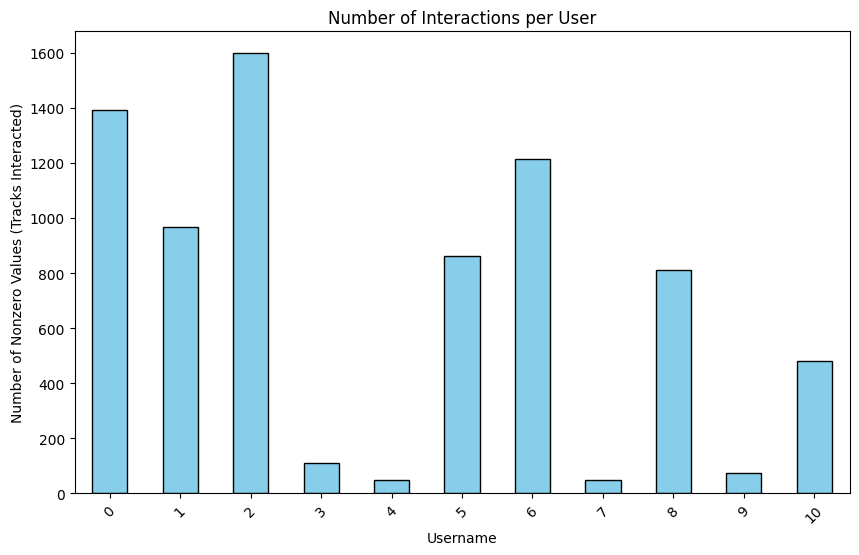

In [84]:
import matplotlib.pyplot as plt

# Count nonzero values per row
nonzero_counts = user_item_matrix.gt(0).sum(axis=1)

# Plot as a bar chart
plt.figure(figsize=(10, 6))
nonzero_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Username")
plt.ylabel("Number of Nonzero Values (Tracks Interacted)")
plt.title("Number of Interactions per User")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [80]:
user_item_matrix.shape

(11, 3371)

In [81]:
import numpy as np
import pandas as pd

# Define dimensions
num_users = user_item_matrix.shape[0]
num_tracks = user_item_matrix.shape[1]
ones_per_user = 400  # Approximate number of 1s per user

# Initialize an empty DataFrame with zeros
rnd_user_item_matrix = pd.DataFrame(np.zeros((num_users, num_tracks), dtype=int))

# Assign 1s randomly for each user
for user in range(num_users):
    ones_indices = np.random.choice(num_tracks, ones_per_user, replace=False)  # Select random track indices
    rnd_user_item_matrix.iloc[user, ones_indices] = 1  # Set selected positions to 1

# Display a sample of the matrix
rnd_user_item_matrix.head()

0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     1     0     1     0     0     0     0     0     0     0     0     1   
2     0     0     0     0     0     0     0     0     0     0     0     1   
3     0     0     0     0     0     1     0     0     1     0     0     0   
4     0     0     0     0     0     0     1     0     0     1     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     1     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     1     0     0     0     0     0     0     0     1   
2     1     0     1     0     0     0     1     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     1     0     0   
4     0     1     0     0     1     0     0     0     0     0     1     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     1     0     0     0     0     0     1     0     0   
1     0     0     0     0     0     1     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     1     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     1     0     0     0     1   
3     0     0     0     0     0     0     0     1     1     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     1     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     1     0     0     0     0     0   
2     0     0     0     0     1     1     1     0     0     0     0     0   
3     1     0     0     0     0     0     0     1     0     0     1     0   
4     0     0     0     0     0     0     0     0     0     1     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     1     1     0     0     0     0     0     1     0     0   
1     0     0     0     0     0     0     0     1     0     0     0     0   
2     0     1     0     0     0     0     0     0     0     0     0     0   
3     0     0     1     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     1   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     1     0     0     0     0     0     0     0   
1     0     1     0     0     0     0     0     0     0     0     0     0   
2     0     0     1     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     1     1     0     0     0     0     0     1   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     1     1     0     0     0     0     0     0     0   
1     0     0     0     0     1     0     0     1     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     1     0     0     0     0   
1     0     0     0     1     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [85]:
# Randomly assign values between 1 and 5 to the 1s in the user-item matrix
#user_item_matrix_random = user_item_matrix.applymap(lambda x: np.random.randint(1, 6) if x == 1 else 0)
user_item_matrix_random=rnd_user_item_matrix.applymap(lambda x: np.random.randint(1, 6) if x == 1 else 0)

user_item_matrix_random.head()

<ipython-input-85-6b25721eb727>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  user_item_matrix_random=rnd_user_item_matrix.applymap(lambda x: np.random.randint(1, 6) if x == 1 else 0)


0     1     2     3     4     5     6     7     8     9     10    11    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     5     0     5     0     0     0     0     0     0     0     0     3   
2     0     0     0     0     0     0     0     0     0     0     0     2   
3     0     0     0     0     0     1     0     0     5     0     0     0   
4     0     0     0     0     0     0     2     0     0     4     0     0   

   12    13    14    15    16    17    18    19    20    21    22    23    \
0     0     3     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     3     0     0     0     0     0     0     0     3   
2     5     0     3     0     0     0     1     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     1     0     0   
4     0     5     0     0     4     0     0     0     0     0     4     0   

   24    25    26    27    28    29    30    31    32    33    34    35    \
0     0     0     0     4     0     0     0     0     0     5     0     0   
1     0     0     0     0     0     1     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     2     0     0   

   36    37    38    39    40    41    42    43    44    45    46    47    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     1     0     0     0     2   
3     0     0     0     0     0     0     0     1     5     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     4     0   

   48    49    50    51    52    53    54    55    56    57    58    59    \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     5     0     0     0     0     0   
2     0     0     0     0     1     5     5     0     0     0     0     0   
3     5     0     0     0     0     0     0     1     0     0     1     0   
4     0     0     0     0     0     0     0     0     0     5     0     0   

   60    61    62    63    64    65    66    67    68    69    70    71    \
0     0     0     2     2     0     0     0     0     0     3     0     0   
1     0     0     0     0     0     0     0     3     0     0     0     0   
2     0     4     0     0     0     0     0     0     0     0     0     0   
3     0     0     5     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     3   

   72    73    74    75    76    77    78    79    80    81    82    83    \
0     0     0     0     0     4     0     0     0     0     0     0     0   
1     0     1     0     0     0     0     0     0     0     0     0     0   
2     0     0     1     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     5     1     0     0     0     0     0     4   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   84    85    86    87    88    89    90    91    92    93    94    95    \
0     0     0     0     2     1     0     0     0     0     0     0     0   
1     0     0     0     0     5     0     0     3     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   96    97    98    99    100   101   102   103   104   105   106   107   \
0     0     0     0     0     0     0     0     1     0     0     0     0   
1     0     0     0     4     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0 

In [ ]:
# #values in the user_song_df are the ratings
# user_item_matrix[:] = np.random.randint(1, 5, size=user_item_matrix.shape)

# # Reset index to make 'username' a regular column
# user_song_df = user_item_matrix.reset_index()


# #rename columns
# user_song_df = user_item_matrix.rename(columns={'username': 'user_id', 'index': 'user_id'})

# # Set 'user_id' and 'track_id' as indexes for rows and columns
# user_song_df = user_song_df.set_index('user_id')
# user_song_df.columns.name = 'track_id'

###4.1.1 SVD Model

In [87]:
from surprise.model_selection import cross_validate
# Convert the user-item matrix to a long format for Surprise
user_item_long = user_item_matrix_random.stack().reset_index()
user_item_long.columns = ['user', 'item', 'rating']

#load the data inot surprise
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(user_item_long, reader)
#print(data)

#split the data into training and test set
trainset, testset =surprise_train_test_split(data, test_size=0.2)

#train the svd model
model = SVD()

model.fit(trainset)

#predict issing values
predictions_svd = model.test(testset)

In [88]:
#cross_validation
cross_validate(model, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2719  1.2646  1.2803  1.2463  1.2722  1.2670  0.0115  
MAE (testset)     1.1242  1.1225  1.1334  1.1119  1.1259  1.1236  0.0069  
Fit time          0.60    0.62    0.62    0.60    0.58    0.60    0.02    
Test time         0.04    0.04    0.04    0.04    0.04    0.04    0.00    


{'test_rmse': array([1.27194624, 1.2645696 , 1.28030794, 1.24625321, 1.27215609]),
 'test_mae': array([1.12419794, 1.12250986, 1.13337369, 1.11191248, 1.12590177]),
 'fit_time': (0.6003875732421875,
  0.6201176643371582,
  0.6229052543640137,
  0.5960180759429932,
  0.5823349952697754),
 'test_time': (0.03854703903198242,
  0.04145646095275879,
  0.03755474090576172,
  0.03739809989929199,
  0.03616619110107422)}

In [90]:
#svd with GridSearchCV
from surprise.model_selection import GridSearchCV

param_grid={
    'n_factors':[50,100],
    'n_epochs':[10,20]
}

gs=GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(data)

# Best parameters
print("Best RMSE Score:", gs.best_score['rmse'])
print("Best Parameters:", gs.best_params['rmse'])

Best RMSE Score: 1.2636807480006145
Best Parameters: {'n_factors': 50, 'n_epochs': 10}


In [91]:
#train final model with the best params
best_svd=SVD(**gs.best_params['rmse']) #unfold the best_svd's params
#trainset=data.build_full_trainset()
trainset, testset = surprise_train_test_split(data, test_size=0.2)
best_svd.fit(trainset)

predictions_best_svd=best_svd.test(testset)

In [92]:
test=pd.DataFrame(predictions_best_svd)
test = test.rename(columns={'uid':'userId', 'iid': 'songId',
                            'r_ui':'actual', 'est':'prediction'})

In [93]:
test.head()

userId  songId  actual  prediction                    details
0      10    3046     0.0         1.0  {'was_impossible': False}
1       9      81     0.0         1.0  {'was_impossible': False}
2       6    3223     0.0         1.0  {'was_impossible': False}
3       5     199     0.0         1.0  {'was_impossible': False}
4       1    3199     0.0         1.0  {'was_impossible': False}

In [94]:
pred_df_best_svd= test.pivot_table(index='userId',
                            columns='songId', values='prediction').fillna(0)


In [95]:
pred_df_best_svd.head(6)

songId  0     1     2     3     4     5     7     8     9     10    11    \
userId                                                                     
0        0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   
1        0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   
3        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
4        0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   
5        1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   

songId  12    13    14    16    17    19    20    21    22    23    24    \
userId                                                                     
0        0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4        0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   

songId  25    26    27    28    29    30    31    32    33    35    36    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   
3        0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
4        0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   
5        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

songId  37    38    39    40    41    42    43    44    45    46    47    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   
1        1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2        0.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   
3        0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   
4        0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
5        0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   

songId  48    49    51    52    53    54    56    57    58    59    60    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1        1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
3        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
4        1.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
5        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

songId  61    62    63    64    65    66    67    68    69    70    71    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   
1        1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
2        1.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   
3        0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4        0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
5        0.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   

songId  72    73    74    75    76    77    78    79    81    82    83    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   
1        0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   1.0   1.0   0.0

In [ ]:
# def get_users_predictions(user_id, n, model):
#     recommended_items = pd.DataFrame(model.loc[user_id])
#     recommended_items.columns = ["predicted_rating"]
#     recommended_items = recommended_items.sort_values('predicted_rating', ascending=False)
#     recommended_items = recommended_items.head(n)
#     return recommended_items.index.tolist()

# def get_recs(model, k):
#     recs = []
#     for user in model.index:
#         df_predictions = get_users_predictions(user, k, model)
#         recs.append(df_predictions)
#     return recs

# # Top-10 recommendations for each user
# k = 10
# recs = get_recs(pred_df, k)
# preds = pd.DataFrame(index=pred_df.index)
# preds[f'Top-{k} Recommendation'] = recs
# preds

In [96]:
from collections import defaultdict
#predictions = best_svd.test(testset)

#convert predictions to a dictionary
#pred_dict=defaultdict(dict)

for pred in predictions_svd:
    uid, iid, true_r, est, _ =pred
    pred_df_best_svd.loc[uid,iid] = round(min(max(est, 1), 5))  # Store predicted rating
#print(pred_dict)

<ipython-input-96-4d3dbe426f80>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_df_best_svd.loc[uid,iid] = round(min(max(est, 1), 5))  # Store predicted rating
<ipython-input-96-4d3dbe426f80>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pred_df_best_svd.loc[uid,iid] = round(min(max(est, 1), 5))  # Store predicted rating
<ipython-input-96-4d3dbe426f80>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all

In [97]:
pred_df_best_svd.head(6)

songId  0     1     2     3     4     5     7     8     9     10    11    \
userId                                                                     
0        1.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   
1        0.0   0.0   0.0   1.0   1.0   1.0   0.0   1.0   0.0   0.0   0.0   
2        0.0   0.0   0.0   1.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   
3        0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   
4        1.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0   0.0   1.0   0.0   
5        1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   

songId  12    13    14    16    17    19    20    21    22    23    24    \
userId                                                                     
0        0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   1.0   0.0   1.0   
1        1.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   
2        1.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   
3        1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
4        0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
5        0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   

songId  25    26    27    28    29    30    31    32    33    35    36    \
userId                                                                     
0        1.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1        1.0   0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   
2        0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   
3        1.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   
4        0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   
5        0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   0.0   

songId  37    38    39    40    41    42    43    44    45    46    47    \
userId                                                                     
0        0.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   1.0   
1        1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   
2        1.0   0.0   1.0   0.0   0.0   1.0   1.0   1.0   1.0   0.0   0.0   
3        0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   
4        0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
5        0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   

songId  48    49    51    52    53    54    56    57    58    59    60    \
userId                                                                     
0        0.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   0.0   0.0   
1        1.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   
2        1.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   
3        1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
4        1.0   1.0   0.0   1.0   0.0   1.0   0.0   1.0   1.0   0.0   1.0   
5        1.0   0.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   

songId  61    62    63    64    65    66    67    68    69    70    71    \
userId                                                                     
0        0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   0.0   
1        1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
2        1.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   0.0   
3        0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   
4        1.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
5        0.0   1.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   0.0   

songId  72    73    74    75    76    77    78    79    81    82    83    \
userId                                                                     
0        0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   
1        0.0   0.0   1.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   
2        0.0   1.0   0.0   1.0   1.0   0.0

###4.1.2 Als Matrix Factorization

In [ ]:
# import pandas as pd
# import numpy as np
# from implicit.als import AlternatingLeastSquares
# import scipy.sparse as sparse
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Φόρτωση δεδομένων
# combined_df = pd.read_excel("combined_df.xlsx")  # Διάβασε το dataset
# #print(combined_df.shape)

# # Δημιουργία user-item matrix
# user_item_matrix = pd.crosstab(combined_df['username'], combined_df['track_id'])

# # Μετατροπή σε sparse matrix
# sparse_matrix = sparse.csr_matrix(user_item_matrix.values)

# # Ορισμός παραμέτρων του ALS
# factors = 50  # Αριθμός latent factors
# regularization = 0.1
# iterations = 20

# # Κάνουμε cross-validation με 5 folds
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# rmse_scores, mae_scores = [], []

# for train_index, test_index in kf.split(user_item_matrix):
#     train_matrix = sparse_matrix[train_index]
#     test_matrix = sparse_matrix[test_index]

#     # Εκπαίδευση μοντέλου
#     als = AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)
#     als.fit(train_matrix)

#     # Πρόβλεψη για το test set
#     test_users = test_matrix.shape[0]
#     predictions, true_ratings = [], []

#     user_factors = als.user_factors
#     item_factors = als.item_factors

#     for user in range(test_users):
#         user_items = test_matrix[user].indices  # Τα items που έχει ο χρήστης στο test set
#         for item in user_items:
#             if item < item_factors.shape[0]:  # Βεβαιώσου ότι το item υπάρχει
#                 pred_rating = np.dot(user_factors[user], item_factors[item])  # Dot product για την πρόβλεψη
#                 true_rating = test_matrix[user, item]
#                 predictions.append(pred_rating)
#                 true_ratings.append(true_rating)

#     # Υπολογισμός σφαλμάτων
#     rmse_scores.append(mean_squared_error(true_ratings, predictions))
#     #print(f"RMSE_Scores are:{rmse_scores}")
#     mae_scores.append(mean_absolute_error(true_ratings, predictions))

# print(f"Mean RMSE: {np.mean(rmse_scores):.4f} ± {np.std(rmse_scores):.4f}")
# print(f"Mean MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")
# #print(user_factors.shape[0])


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Mean RMSE: 0.4895 ± 0.1396
Mean MAE: 0.4911 ± 0.1396


In [99]:
# Φόρτωση δεδομένων
#combined_df = pd.read_excel("combined_df.xlsx")  # Διάβασε το dataset

# Δημιουργία user-item matrix
#user_item_matrix = pd.crosstab(combined_df['username'], combined_df['track_id'])

# Μετατροπή σε sparse matrix
sparse_matrix = sparse.csr_matrix(rnd_user_item_matrix.values)



# Training and test set for evry user
#every user has data on train and test set
train_data = []
test_data = []

for user in rnd_user_item_matrix.index:  #for every user
    user_ratings = rnd_user_item_matrix.loc[user]  #get each user's ratings
    rated_items = user_ratings[user_ratings > 0].index  #items that have rated

    if len(rated_items) < 2:
        continue  #if the user has rated only one item ignore

    train_items, test_items = train_test_split(rated_items, test_size=0.2, random_state=42)  #80%train - 20% test

    train_data.extend([(user, item) for item in train_items])
    test_data.extend([(user, item) for item in test_items])

#train matrix and test matrix
train_matrix = pd.DataFrame(0, index=rnd_user_item_matrix.index, columns=rnd_user_item_matrix.columns)
test_matrix = train_matrix.copy()

for user, item in train_data:
    train_matrix.loc[user, item] = rnd_user_item_matrix.loc[user, item]

for user, item in test_data:
    test_matrix.loc[user, item] = rnd_user_item_matrix.loc[user, item]

#convert in csr matrices for als algorithm
train_sparse = sparse.csr_matrix(train_matrix.values)
test_sparse = sparse.csr_matrix(test_matrix.values)

#parameters for als
factors = 50  #latent factors
regularization = 0.1
iterations = 20

#tarin als
als = AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)
als.fit(train_sparse)

#predict
predictions_als, true_ratings = [], []

user_factors = als.user_factors
item_factors = als.item_factors

#scale prediction to be between 1-5
min_rating = np.min(user_factors @ item_factors.T)
max_rating = np.max(user_factors @ item_factors.T)



for user in range(train_matrix.shape[0]):
    user_items = test_sparse[user].indices  #items that user has rated in test set
    for item in user_items:
        if item < item_factors.shape[0]: #if item exist
            raw_pred_rating = np.dot(user_factors[user], item_factors[item]) #predict with the dot product
            true_rating = test_sparse[user, item]

            #scale prediction to be between 1-5
            scaled_prediction = 1 + (raw_pred_rating - min_rating) / (max_rating - min_rating) * 4
            print(f"Scaled_prediction:{scaled_prediction}")

            predictions_als.append(scaled_prediction)
            true_ratings.append(true_rating)

print(f"Predictions{predictions_als}")
print(f"True ratings{true_ratings}")

#compute rmse and mae
rmse = mean_squared_error(true_ratings, predictions_als)
mae = mean_absolute_error(true_ratings, predictions_als)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


/usr/local/lib/python3.11/dist-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()


  0%|          | 0/20 [00:00<?, ?it/s]

Scaled_prediction:1.0101272948086262
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0090195946395397
Scaled_prediction:1.0024815096985549
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0106521267443895
Scaled_prediction:1.0072836466133595
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0106493020430207
Scaled_prediction:1.0080264192074537
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0103383548557758
Scaled_prediction:1.0139940436929464
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.004172436427325
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.008026977069676
Scaled_prediction:1.010701266117394
Scaled_prediction:1.0042628152295947
Scaled_prediction:1.0024152738042176
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0039472305215895
Scaled_prediction:1.0063969143666327
Scal

In [105]:
#recommnd for every user
def recommend_for_user(user_id):
  if user_id < user_factors.shape[0]:
      recommendations = als.recommend(user_id, sparse_matrix[user_id], N=5)
      print(f"Top 5 Recommendations for user:{user_id}")
      print(recommendations)
  else:
      print("Λάθος user_id: Εκτός ορίων!")

In [117]:
#for every user
for user_id in range(user_factors.shape[0]):
  recommend_for_user(user_id)


Top 5 Recommendations for user:0
(array([2213, 1543, 2268, 2275, 2216], dtype=int32), array([0.00681556, 0.00625946, 0.0059102 , 0.00587319, 0.00537723],
      dtype=float32))
Top 5 Recommendations for user:1
(array([  77,  409,  992,  283, 1729], dtype=int32), array([0.00633994, 0.00548814, 0.00534895, 0.00534803, 0.00528024],
      dtype=float32))
Top 5 Recommendations for user:2
(array([ 753, 1050, 1049,  841, 1045], dtype=int32), array([0.00464234, 0.0043922 , 0.00438763, 0.00438375, 0.00438247],
      dtype=float32))
Top 5 Recommendations for user:3
(array([ 763, 2534, 1729, 1315,  577], dtype=int32), array([0.00174637, 0.00166701, 0.00155411, 0.00147797, 0.0014329 ],
      dtype=float32))
Top 5 Recommendations for user:4
(array([ 763,  577, 2534, 1729, 2324], dtype=int32), array([0.00301438, 0.00298255, 0.00296415, 0.00292409, 0.00286567],
      dtype=float32))
Top 5 Recommendations for user:5
(array([ 467,  418,  469, 1177,  142], dtype=int32), array([0.00467629, 0.00467551, 0.0

In [95]:
import pandas as pd
import numpy as np
from implicit.als import AlternatingLeastSquares
import scipy.sparse as sparse
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Φόρτωση δεδομένων
combined_df = pd.read_excel("combined_df.xlsx")  # Διάβασε το dataset

# Δημιουργία user-item matrix
user_item_matrix = pd.crosstab(combined_df['username'], combined_df['track_id'])

# Μετατροπή σε sparse matrix
sparse_matrix = sparse.csr_matrix(user_item_matrix.values)

# Ορισμός πλέγματος παραμέτρων για Grid Search
param_grid = {
    'factors': [10, 50, 100],
    'regularization': [0.01, 0.1, 1.0],
    'iterations': [10, 20, 50]
}

best_rmse = float("inf")
best_params = None

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search
for factors in param_grid['factors']:
    for regularization in param_grid['regularization']:
        for iterations in param_grid['iterations']:
            rmse_scores, mae_scores = [], []

            for train_index, test_index in kf.split(user_item_matrix):
                train_matrix = sparse_matrix[train_index]
                test_matrix = sparse_matrix[test_index]

                # Εκπαίδευση μοντέλου
                als = AlternatingLeastSquares(factors=factors, regularization=regularization, iterations=iterations)
                als.fit(train_matrix)

                # Πρόβλεψη για το test set
                test_users = test_matrix.shape[0]
                predictions, true_ratings = [], []

                user_factors = als.user_factors
                item_factors = als.item_factors

                for user in range(test_users):
                    user_items = test_matrix[user].indices  # Τα items που έχει ο χρήστης στο test set
                    for item in user_items:
                        if item < item_factors.shape[0]:  # Βεβαιώσου ότι το item υπάρχει
                            pred_rating = np.dot(user_factors[user], item_factors[item])  # Dot product για την πρόβλεψη
                            true_rating = test_matrix[user, item]
                            predictions.append(pred_rating)
                            true_ratings.append(true_rating)

                # Υπολογισμός σφαλμάτων
                rmse_scores.append(mean_squared_error(true_ratings, predictions))
                mae_scores.append(mean_absolute_error(true_ratings, predictions))

            mean_rmse = np.mean(rmse_scores)
            mean_mae = np.mean(mae_scores)
            print(f"Factors: {factors}, Regularization: {regularization}, Iterations: {iterations}")
            print(f"RMSE: {mean_rmse:.4f}, MAE: {mean_mae:.4f}\n")

            if mean_rmse < best_rmse:
                best_rmse = mean_rmse
                best_params = {'factors': factors, 'regularization': regularization, 'iterations': iterations}

print("Best Parameters:", best_params)

# Εκπαίδευση τελικού μοντέλου με τις καλύτερες παραμέτρους
best_als = AlternatingLeastSquares(
    factors=best_params['factors'],
    regularization=best_params['regularization'],
    iterations=best_params['iterations']
)

best_als.fit(sparse_matrix)

# Πρόβλεψη προτάσεων για έναν χρήστη
user_id = 0  # Επέλεξε έναν χρήστη
if user_id < best_als.user_factors.shape[0]:
    recommendations = best_als.recommend(user_id, sparse_matrix[user_id], N=5)
    print("Top 5 Recommendations:")
    print(recommendations)
else:
    print("Λάθος user_id: Εκτός ορίων!")


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 10, Regularization: 0.01, Iterations: 10
RMSE: 0.4906, MAE: 0.4907



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 10, Regularization: 0.01, Iterations: 20
RMSE: 0.4906, MAE: 0.4907



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 10, Regularization: 0.01, Iterations: 50
RMSE: 0.4906, MAE: 0.4907



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 10, Regularization: 0.1, Iterations: 10
RMSE: 0.4866, MAE: 0.4923



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 10, Regularization: 0.1, Iterations: 20
RMSE: 0.4881, MAE: 0.4917



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 10, Regularization: 0.1, Iterations: 50
RMSE: 0.4888, MAE: 0.4909



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 10, Regularization: 1.0, Iterations: 10
RMSE: 0.4839, MAE: 0.4943



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 10, Regularization: 1.0, Iterations: 20
RMSE: 0.4847, MAE: 0.4965



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 10, Regularization: 1.0, Iterations: 50
RMSE: 0.4860, MAE: 0.4989



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 50, Regularization: 0.01, Iterations: 10
RMSE: 0.4907, MAE: 0.4907



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 50, Regularization: 0.01, Iterations: 20
RMSE: 0.4907, MAE: 0.4907



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 50, Regularization: 0.01, Iterations: 50
RMSE: 0.4907, MAE: 0.4907



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 50, Regularization: 0.1, Iterations: 10
RMSE: 0.4895, MAE: 0.4911



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 50, Regularization: 0.1, Iterations: 20
RMSE: 0.4894, MAE: 0.4910



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 50, Regularization: 0.1, Iterations: 50
RMSE: 0.4897, MAE: 0.4910



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 50, Regularization: 1.0, Iterations: 10
RMSE: 0.4808, MAE: 0.4953



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 50, Regularization: 1.0, Iterations: 20
RMSE: 0.4843, MAE: 0.4967



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 50, Regularization: 1.0, Iterations: 50
RMSE: 0.4860, MAE: 0.4990



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 100, Regularization: 0.01, Iterations: 10
RMSE: 0.4907, MAE: 0.4908



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 100, Regularization: 0.01, Iterations: 20
RMSE: 0.4906, MAE: 0.4908



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 100, Regularization: 0.01, Iterations: 50
RMSE: 0.4907, MAE: 0.4907



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 100, Regularization: 0.1, Iterations: 10
RMSE: 0.4901, MAE: 0.4910



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 100, Regularization: 0.1, Iterations: 20
RMSE: 0.4901, MAE: 0.4910



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 100, Regularization: 0.1, Iterations: 50
RMSE: 0.4900, MAE: 0.4910



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Factors: 100, Regularization: 1.0, Iterations: 10
RMSE: 0.4805, MAE: 0.4958



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Factors: 100, Regularization: 1.0, Iterations: 20
RMSE: 0.4844, MAE: 0.4972



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Factors: 100, Regularization: 1.0, Iterations: 50
RMSE: 0.4860, MAE: 0.4990

Best Parameters: {'factors': 100, 'regularization': 1.0, 'iterations': 10}


  0%|          | 0/10 [00:00<?, ?it/s]

Top 5 Recommendations:
(array([2275, 1466, 1543, 2213, 2271], dtype=int32), array([0.0467713 , 0.04677129, 0.04677124, 0.04677116, 0.04523857],
      dtype=float32))


##4.2 Jaccard similarity function for users

In [96]:
#jaccard similarity between 2 users
def jaccard_similarity(user1, user2,matrix):
  user_1=matrix.loc[user1]
  user_2=matrix.loc[user2]
  return jaccard_score(user_1, user_2, average='macro')

##4.3 3-user groups based on jaccard similarity

In [ ]:
#compute all the combinations of 3-group users only once
# user_similarity={}
# def get_similarity(user1, user2, df, user_similarity):
#   if tuple(sorted((user1,user2))) in user_similarity:
#     #print(f"for tuple {(user1, user2)} exist don't calculate it again just retrieve the value)")
#     return user_similarity[(user1,user2)]
#   else:
#     #print(f"for tuple {(user1, user2)} does not exist calculate it now")
#     similarity=jaccard_similarity(user1, user2, df)
#     user_similarity[(user1,user2)]=similarity
#     return similarity

In [ ]:
# groups=[]
# for user_comb in itertools.combinations(user_song_df.index, 3):
#   u1,u2,u3=user_comb #make all the possible combinations

#   sim_u1_u2=get_similarity(u1,u2,user_song_df,user_similarity)
#   sim_u1_u3=get_similarity(u1,u3,user_song_df,user_similarity)
#   sim_u2_u3=get_similarity(u2,u3,user_song_df,user_similarity)
#   #print(f"Similarity between {u1} and {u2}: {sim_u1_u2}")
#   #print(f"Similarity between {u1} and {u3}: {sim_u1_u3}")
#   #print(f"Similarity between {u2} and {u3}: {sim_u2_u3}")

#   avg_similarity=(sim_u1_u2+sim_u1_u3+sim_u2_u3)/3
#   if avg_similarity>0.2:
#     groups.append((u1,u2,u3))
# print(groups)




In [97]:
similarity_groups=[]
similarity_threshold=0.1
for user in user_item_matrix_random.index:
  #print(user)
  similar_users = sorted([u for u in user_item_matrix_random.index if u != user and jaccard_similarity(user,u, user_item_matrix_random)>=similarity_threshold],
                         key=lambda u: jaccard_similarity(user, u, user_item_matrix_random),reverse=True)[:2]

  similarity_groups.append([user] + similar_users)

In [98]:
similarity_groups

[[0, 4, 9],
 [1, 4, 3],
 [2, 6, 3],
 [3, 4, 1],
 [4, 3, 0],
 [5, 7, 9],
 [6, 2, 0],
 [7, 5, 1],
 [8, 10, 4],
 [9, 0, 5],
 [10, 8, 1]]

In [ ]:
#cosine_similarity(user_item_matrix_random.loc[1].values.reshape(1, -1), user_item_matrix_random.loc[2].values.reshape(1, -1) )

In [ ]:
#cosine_similarity(user_item_matrix_random)

In [ ]:
# # Calculate cosine similarity between users
# #user_similarity_matrix = cosine_similarity(user_item_matrix_random)

# # Convert the similarity matrix to a DataFrame for easier handling
# user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)
# user_similarity_df

In [ ]:
# def generate_groups(user_similarity_df, group_size=3):
#    users = user_similarity_df.index.tolist()

#    groups=[]
#    for user in users:
#     #find the 2 most similar users to that one base student
#     similar_users = sorted([u for u in users if u != user],
#                            key=lambda u: user_similarity_df.loc[user, u], reverse=True)[:2]
#     groups.append([user] + similar_users)
#    return groups


In [ ]:
# groups=generate_groups(user_similarity_df)

In [ ]:
# groups

##4.4 Attempt with Minhash LSH for creating the groups

In [ ]:
def convert_crosstab_in_set_for_every_user(user_song_df):
  user_songs_dict={}
  for user in user_song_df.index:
    #print(user)
    #make a set for every user
    user_songs=set()
    for song in user_song_df.columns:
      if user_song_df.loc[user,song]>0:
        #print(song)
        #put th id of the song in the set
        user_songs.add(song)
    user_songs_dict[user]=user_songs
    #print(f"User {user} has listened to: {user_songs}")
  return user_songs_dict


In [ ]:
user_songs_dict=convert_crosstab_in_set_for_every_user(user_item_matrix_random)

In [ ]:
minhashes = {}
for user, songs in user_songs_dict.items():
    m = MinHash(num_perm=128)
    for song in songs:
        m.update(str(song).encode('utf8'))
    minhashes[user] = m

#LSH
lsh = MinHashLSH(threshold=0.2,num_perm=128)
for user, mh in minhashes.items():
    lsh.insert(user, mh)

In [ ]:
for user in user_songs_dict.keys():
  #print(user)
  similar_users = lsh.query(minhashes[user])
  print(f"Similar to user {user}: {similar_users}")


Similar to user 0: [0, 8]
Similar to user 1: [1, 7]
Similar to user 2: [9, 2]
Similar to user 3: [3]
Similar to user 4: [9, 10, 4]
Similar to user 5: [5]
Similar to user 6: [6]
Similar to user 7: [8, 1, 7]
Similar to user 8: [8, 0, 10, 7]
Similar to user 9: [9, 2, 4]
Similar to user 10: [8, 10, 4]


##4.5 find the best parameters in LSH Minhash

In [ ]:
#jaccard similarity for a set of users
def calculate_jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

# reference data for evaluation
reference_data = {}
users = list(user_songs_dict.keys())
for i in range(len(users)):
    for j in range(i + 1, len(users)):
        similarity = calculate_jaccard_similarity(user_songs_dict[users[i]], user_songs_dict[users[j]])
        reference_data[(users[i], users[j])] = similarity
        #reference_data[(users[j], users[i])] = similarity


In [ ]:
def evaluate_with_reference(lsh, reference_data, minhashes):
    scores = []
    for (user1, user2), ref_score in reference_data.items():
        #find the similar users using LSH
        similar_users = set(lsh.query(minhashes[user1]))
        is_similar = 1 if user2 in similar_users else 0
        scores.append((ref_score, is_similar))
    return scores

In [ ]:
#parameter grid search space
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
permutations = [32, 64, 128, 256]

best_threshold = None
best_permutation = None
best_score = -1  #initialize with a low value


results=[]

for threshold, num_perm in product(thresholds, permutations):
    #create minhash objects
    minhashes = {}
    for user, songs in user_item_matrix_random.items():
        m = MinHash(num_perm=num_perm)
        for song in songs:
            m.update(str(song).encode('utf8'))
        minhashes[user] = m

    # Create LSH index
    lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
    for user, mh in minhashes.items():
        lsh.insert(user, mh)

    #print the number of buckets an drows in lsh minhash
    #print(f"Number of buckets: {lsh.b}, Number of rows: {lsh.r}")

    # Evaluate
    scores = evaluate_with_reference(lsh, reference_data, minhashes)

    # Calculate evaluation metrics (e.g., precision, recall, F1-score, accuracy)
    true_positives = sum(1 for ref_score, is_similar in scores if ref_score > 0.5 and is_similar == 1)
    false_positives = sum(1 for ref_score, is_similar in scores if ref_score <= 0.5 and is_similar == 1)
    false_negatives = sum(1 for ref_score, is_similar in scores if ref_score > 0.5 and is_similar == 0)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    correct_predictions = sum(1 for ref, pred in scores if (ref > 0.2 and pred == 1) or (ref <=0.2 and pred == 0))
    accuracy = correct_predictions / len(scores)


    print(f"Threshold: {threshold}, Permutations: {num_perm}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}, Accuracy: {accuracy:.4f}")


    #take into account also the accuracy
    if accuracy > best_score:
        best_score = accuracy
        best_threshold = threshold
        best_permutation = num_perm


    results.append({
        "threshold": threshold,
        "num_perm": num_perm,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "accuracy": accuracy
    })

print(f"\nBest Threshold: {best_threshold}, Best Permutations: {best_permutation}, Best Accuracy: {best_score}")

Threshold: 0.1, Permutations: 32, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0000
Threshold: 0.1, Permutations: 64, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0000
Threshold: 0.1, Permutations: 128, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0000
Threshold: 0.1, Permutations: 256, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0000
Threshold: 0.2, Permutations: 32, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0727
Threshold: 0.2, Permutations: 64, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0000
Threshold: 0.2, Permutations: 128, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0000
Threshold: 0.2, Permutations: 256, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0000
Threshold: 0.3, Permutations: 32, Precision: 0.0000, Recall: 0.0000
F1-score: 0.0000, Accuracy: 0.0727
Threshold: 0.3, Permutations: 64, Precision: 0.0000, Recall: 0.0000
F

In [ ]:
# Convert results to a dataframe
results_df = pd.DataFrame(results)

In [ ]:
results_df.head(5)

threshold  num_perm  precision  recall  f1_score  accuracy
0        0.1        32        0.0       0         0  0.000000
1        0.1        64        0.0       0         0  0.000000
2        0.1       128        0.0       0         0  0.000000
3        0.1       256        0.0       0         0  0.000000
4        0.2        32        0.0       0         0  0.072727

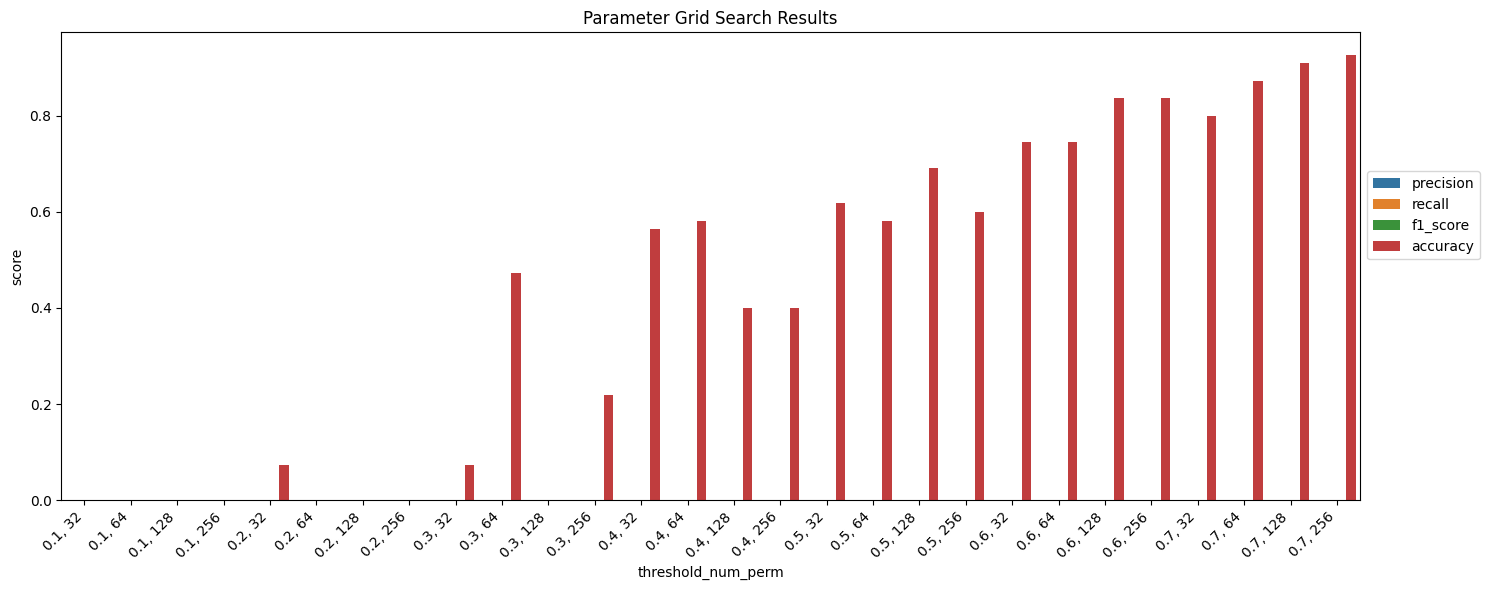

In [ ]:

# Melt the DataFrame to combine 'threshold' and 'num_perm' into a single column
melted_df = pd.melt(results_df, id_vars=['threshold', 'num_perm'],
                    value_vars=['precision', 'recall', 'f1_score', 'accuracy'],
                    var_name='metric', value_name='score')

# Create a new column combining 'threshold' and 'num_perm'
melted_df['threshold_num_perm'] = melted_df['threshold'].astype(str) + ', ' + melted_df['num_perm'].astype(str)

# Create the grouped bar plot using seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x='threshold_num_perm', y='score', hue='metric',
            data=melted_df, errorbar=None)
plt.title('Parameter Grid Search Results')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##4.6 Jaccard Similarity vs LSH Probabillity visualization

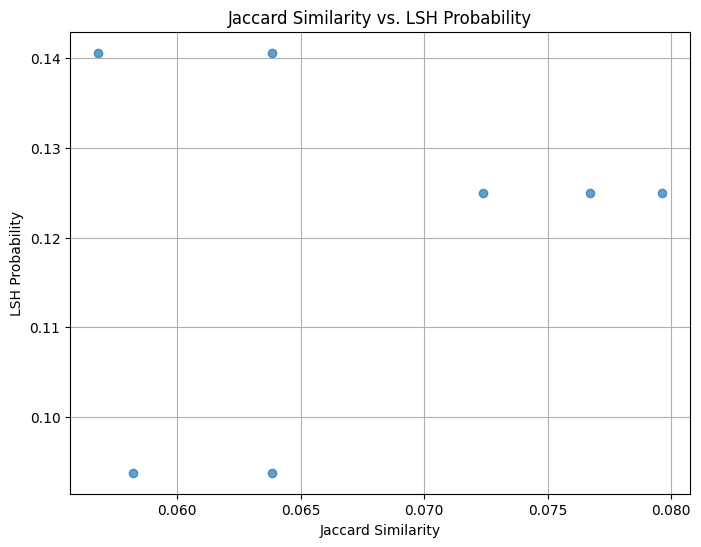

In [ ]:
#initialize minhashses
num_perm = 64
minhashes = {}
for user, songs in user_songs_dict.items():
    m = MinHash(num_perm=num_perm)
    for song in songs:
        m.update(str(song).encode('utf8'))
    minhashes[user] = m

# Initialize LSH
threshold = 0.2
lsh = MinHashLSH(threshold=threshold, num_perm=num_perm)
for user, mh in minhashes.items():
    lsh.insert(user, mh)

#get candidate pairs by quering the keys for similar users
candidate_pairs = []
for user in user_songs_dict.keys():
    for other_user in lsh.query(minhashes[user]):
        if user != other_user and (other_user, user) not in candidate_pairs:  # Avoid duplicates
            candidate_pairs.append((user, other_user))

#calculate jaccard similarity and lsh probs f every pair
jaccard_similarities = []
lsh_probabilities = []

for user1, user2 in candidate_pairs:
    set1 = user_songs_dict[user1]
    set2 = user_songs_dict[user2]

    # Jaccard similarity
    jaccard = calculate_jaccard_similarity(set1, set2)
    jaccard_similarities.append(jaccard)

    # LSH probability (approximated as MinHash similarity)
    mh1 = minhashes[user1]
    mh2 = minhashes[user2]
    lsh_prob = mh1.jaccard(mh2)
    lsh_probabilities.append(lsh_prob)

# Plot Jaccard similarity vs. LSH probability
plt.figure(figsize=(8, 6))
plt.scatter(jaccard_similarities, lsh_probabilities, alpha=0.7)

plt.xlabel("Jaccard Similarity")
plt.ylabel("LSH Probability")
plt.title("Jaccard Similarity vs. LSH Probability")

plt.grid(True)
plt.show()

#5.Define Strategies for recommendations

##1 rst Approach: Items not been seen by any memebr of the group

1. Identify items not listened to by any group member.

2. Use the SVD predictions to rank these items.

3. Select the top-N items based on the predicted ratings.

In [108]:
def get_unseen_items(group, user_item_matrix):
  group_items=user_item_matrix.loc[group].sum(axis=0) #selecting rows that corresponding to group members
                                                      #and sum along the columns(vertically , down the rows)
  unseen_items=group_items[group_items==0].index.tolist()
  return unseen_items

In [109]:
print(get_unseen_items(similarity_groups[1], user_item_matrix))

[1, 2, 3, 4, 5, 7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 52, 53, 54, 55, 56, 59, 60, 61, 62, 63, 64, 67, 69, 70, 71, 72, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 101, 102, 103, 105, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 127, 128, 129, 130, 133, 134, 135, 136, 139, 140, 141, 144, 145, 146, 147, 148, 150, 151, 153, 155, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 194, 195, 196, 199, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 218, 219, 220, 221, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 250, 251, 252, 254, 255, 256, 257, 258, 261, 262, 263, 264, 266, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 2

In [110]:
def recommend_unseen_items(group, user_item_matrix, svd_model, top_n=10):

  unseen_items=get_unseen_items(group, user_item_matrix)
  print(unseen_items )
  predictions=[]
  for item in unseen_items:

    #predict the rating for each user of the group
    predicted_ratings=[svd_model.predict(user, item).est for user in group]

    #take the average predictions
    average_rating=sum(predicted_ratings)/len(predicted_ratings)

    predictions.append((item,average_rating))

  #sort predictions by average predicted rating
  predictions.sort(key=lambda x: x[1], reverse=True)

  #return the top n items
  top_items=[item for item, average_rating in predictions[:top_n]]
  return top_items

In [111]:
top_items=recommend_unseen_items(similarity_groups[0], user_item_matrix, best_svd)
print(top_items)

[1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 156

In [112]:
def recommend_unseen_items_als(group, user_item_matrix, als_model, top_n=10):
    user_index = [user_item_matrix.index.get_loc(user) for user in group if user in user_item_matrix.index]
    print(user_index)
    unseen_items = get_unseen_items(group, user_item_matrix)
    print(unseen_items)
    predictions = []

    for item in unseen_items:
        item_index = user_item_matrix.columns.get_loc(item)
        #print(item_index)
        predicted_ratings = [als_model.user_factors[u] @ als_model.item_factors[item_index] for u in user_index]
        #print(predicted_ratings)
        average_rating = np.mean(predicted_ratings)
        predictions.append((item, average_rating))

    predictions.sort(key=lambda x: x[1], reverse=True)
    return [item for item, _ in predictions[:top_n]]


In [113]:
top_items_als=recommend_unseen_items_als(similarity_groups[0], user_item_matrix, best_als)
print(top_items_als)

[0, 4, 9]
[1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559,

In [114]:
#for all groups
group_suggestions_not_seen=[]
for group in similarity_groups:
  top_items=recommend_unseen_items(group, user_item_matrix, best_svd)
  group_suggestions_not_seen.append(top_items)

[1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 156

In [116]:
#print group_suggestions_not_seen
for i, group in enumerate(similarity_groups):
  print(f"Group {i}: {group_suggestions_not_seen[i]}")

Group 0: [1484, 3273, 2153, 3290, 2548, 2966, 1894, 1860, 2282, 2429]
Group 1: [1484, 1944, 2714, 1639, 1860, 3331, 1686, 582, 1, 2]
Group 2: [2714, 2820, 270, 3108, 3331, 1207, 1195, 2725, 3144, 3]
Group 3: [1484, 1944, 2714, 1639, 1860, 3331, 1686, 582, 1, 2]
Group 4: [1484, 1944, 2714, 1639, 3290, 2216, 1860, 3331, 1686, 2578]
Group 5: [2130, 1484, 3273, 1387, 3045, 310, 1375, 2153, 2463, 2548]
Group 6: [2820, 3290, 3108, 2725, 3144, 2400, 2401, 2402, 2403, 2418]
Group 7: [2130, 1484, 1387, 3045, 1375, 600, 518, 1880, 1548, 1138]
Group 8: [1484, 582, 796, 578, 734, 1572, 2428, 1435, 3063, 1860]
Group 9: [2130, 3273, 1484, 2153, 3290, 2548, 1880, 1548, 1686, 3254]
Group 10: [582, 1484, 796, 1572, 1435, 3063, 703, 1578, 2857, 809]


##2nd approach:Items seen by at least one or two users in the group

In [ ]:
def get_seen_items(group, user_item_matrix, min_seen=int):
  group_items=user_item_matrix.loc[group].sum(axis=0) #selecting rows that corresponding to group members
                                                      #and sum along the columns(vertically , down the rows)
  seen_items=group_items[group_items>=min_seen].index.tolist() #keep items that have seen at least by min_seen
  return seen_items

In [ ]:
def recommend_seen_items(group, user_item_matrix, svd_model, top_n=10):

  items_1=get_seen_items(group, user_item_matrix, min_seen=1)
  #print(items_1)
  items_2=get_seen_items(group, user_item_matrix, min_seen=2)

  #print(f"Items seen by at least one user: {len(items_1)}")
  #print(f"Items seen by at least two users: {len(items_2)}")

  #calculate predicted ratings and then mean in order to get more group-oriented recommendations
  all_predictions = [svd_model.predict(user, item).est
                    for user in group for item in user_item_matrix.columns]
  group_baseline = np.mean(all_predictions)

  predictions_1=[]
  predictions_2=[]

  for item in items_1:
    predicted_ratings_1=[]
    for user in group:
      #predict the rating for each user of the group
      if user_item_matrix.loc[user,item]> 0:
        ratings=user_item_matrix_random.loc[user,item]
      else:
        ratings=svd_model.predict(user, item).est + group_baseline
      predicted_ratings_1.append(ratings)
    weighted_average_rating_1=sum(predicted_ratings_1)/len(predicted_ratings_1)
    predictions_1.append((item, weighted_average_rating_1))

  #sort predictions by average predicted rating
  predictions_1.sort(key=lambda x: x[1], reverse=True)

  #return the top n items
  top_items_1=[item for item,_ in predictions_1[:top_n]]

  for item in items_2:
    predicted_ratings_2 = []
    for user in group:
        if user_item_matrix.loc[user, item] > 0:
            ratings = user_item_matrix_random.loc[user, item]
        else:
            ratings = svd_model.predict(user, item).est + (group_baseline * 2)
        predicted_ratings_2.append(ratings)

    weighted_average_rating_2 = sum(predicted_ratings_2) / len(predicted_ratings_2)
    predictions_2.append((item, weighted_average_rating_2))

  predictions_2.sort(key=lambda x: x[1], reverse=True)
  top_items_2 = [item for item, _ in predictions_2[:top_n]]


  return top_items_1, top_items_2

In [ ]:
top_items_1, top_items_2=recommend_seen_items(similarity_groups[0], user_item_matrix, best_svd)
print(top_items_1)
print(top_items_2)

[582, 33, 183, 186, 205, 211, 311, 378, 436, 513]
[2601, 2607, 2609, 497, 1543, 1923, 913, 2604, 894, 1274]


In [ ]:
#for all groups
group_suggestions_seen_1=[]
group_suggestions_seen_2=[]
#group_suggestions_seen=[]
for group in similarity_groups:
  top_items_1, top_items_2=recommend_seen_items(group, user_item_matrix, best_svd)
  group_suggestions_seen_1.append(top_items_1)
  group_suggestions_seen_2.append(top_items_2)
  #group_suggestions_seen.append(top_items_1+top_items_2)

In [ ]:
#print
for i, group in enumerate(similarity_groups):
  print(f"Group {i}:")
  print(f"  - Strategy 1 (seen by at least one): {group_suggestions_seen_1[i]}")
  print(f"  - Strategy 2 (seen by at least two): {group_suggestions_seen_2[i]}")
  print("-" * 50)  # Separator for readability

Group 0:
  - Strategy 1 (seen by at least one): [582, 33, 183, 186, 205, 211, 311, 378, 436, 513]
  - Strategy 2 (seen by at least two): [2601, 2607, 2609, 497, 1543, 1923, 913, 2604, 894, 1274]
--------------------------------------------------
Group 1:
  - Strategy 1 (seen by at least one): [178, 293, 417, 715, 758, 795, 852, 878, 931, 1046]
  - Strategy 2 (seen by at least two): [0, 510, 1543, 497, 2213, 2275, 2601, 197, 613, 1377]
--------------------------------------------------
Group 2:
  - Strategy 1 (seen by at least one): [1729, 1059, 1484, 106, 119, 137, 149, 268, 336, 408]
  - Strategy 2 (seen by at least two): [1729, 1059, 340, 2160, 8, 12, 216, 249, 482, 486]
--------------------------------------------------
Group 3:
  - Strategy 1 (seen by at least one): [178, 293, 417, 715, 758, 795, 852, 878, 931, 1046]
  - Strategy 2 (seen by at least two): [0, 510, 1543, 497, 2213, 2275, 2601, 197, 613, 1377]
--------------------------------------------------
Group 4:
  - Strategy 1

In [ ]:
def check_svd_predictions(group, user_item_matrix, svd_model):
    """
    Check if SVD model returns the same predictions for min_seen=1 and min_seen=2.
    """
    items_1 = get_seen_items(group, user_item_matrix, min_seen=1)
    print(f"Items_1{items_1}")
    items_2 = get_seen_items(group, user_item_matrix, min_seen=2)
    print(f"Items_2:{items_2}")

    # Take a small sample for checking
    sample_items = list(set(items_1[:6] + items_2[:6]))  # Take first 5 from each (unique items)

    print("Sample items being tested:", sample_items)

    # Store predictions
    predictions = {}

    for item in sample_items:
        pred_ratings_1 = [svd_model.predict(user,item).est for user in group]
        pred_ratings_2 = [svd_model.predict(user,item).est for user in group]

        avg_pred_1 = sum(pred_ratings_1) / len(pred_ratings_1)
        avg_pred_2 = sum(pred_ratings_2) / len(pred_ratings_2)

        predictions[item] = (avg_pred_1, avg_pred_2)

    #print
    print("\n **SVD Model Predictions Comparison**")
    for item, (pred1, pred2) in predictions.items():
        print(f"Item {item}: min_seen=1 -> {pred1:.4f}, min_seen=2 -> {pred2:.4f}")

    #check if the predictions from svd are identical
    identical_predictions = all(abs(pred1 - pred2) < 1e-5 for pred1, pred2 in predictions.values())

    if identical_predictions:
        print("\n SVD model is returning identical predictions for min_seen=1 and min_seen=2!")
    else:
        print("\n SVD model is returning different predictions for min_seen=1 and min_seen=2.")
check_svd_predictions(similarity_groups[0], user_item_matrix, best_svd)


Items_1[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

#6.Make model and train

##6.1 Compute user_weights based on the songs that have heard

In [ ]:
#user_weights_count = df.groupby('username')['track_id'].count()
#user_weights_mean = df.groupby('username')['rating'].mean()
#user_weights_diversity = df.groupby('username')['track_genre'].nunique()

#user_weights = (
 #   0.4 * (user_weights_count / user_weights_count.max()) +
 #   0.4 * (user_weights_mean / user_weights_mean.max()) +
 #   0.2 * (user_weights_diversity / user_weights_diversity.max())
#)


In [ ]:
# user_weights=combined_df.groupby('username')['track_id'].count()

# #scale them to (0,1)
# user_weights=user_weights/user_weights.max()
# user_weights


##6.2 Train an SVD model for every user


In [ ]:
# reader=Reader(rating_scale=(1, 5))
# #for every group
# group_suggestions=[]#list for the suggestions of the group
# for group in groups:
#   group_recommendations={} #dictionary to store predictions for every user with weights
#                            #in the group

#   #for each user train and fit and svd algorithm
#   for user in group:

#     #filter train data for every user
#     user_data=combined_df[combined_df['username']==user]


#     #Create a DataFrame for Surprise package in the form [username, track_id, rating]
#     user_surprise_data=user_data[['username', 'track_id', 'rating']]

#     #fit
#     data=Dataset.load_from_df(user_surprise_data, reader)
#     trainset = data.build_full_trainset()
#     svd = SVD()
#     svd.fit(trainset)

#     #predict
#     predictions_train=svd.test(trainset.build_testset())
#     #print(f"Group:", group)
#     #print(predictions_train)

#     #evaluate the prediction
#     #accuracy.mse(predictions_train)

#     #unseen tracks of the user
#     unseen_tracks =combined_df[~combined_df['track_id'].isin(user_data['track_id'])]['track_id'].unique()
#     #print(unseen_tracks)

#     for track in unseen_tracks:
#       #predict if match
#       prediction = svd.predict(user, track)
#       if track not in group_recommendations:
#         group_recommendations[track]=[] #if the song does not included in the list, make a list for that
#       group_recommendations[track].append((prediction.est,user_weights[user])) #append in the list the estimation and its weights


#   #[(2.3476610548908505, 0.02952565343659245),
#   #(2.7481380706904295, 0.5024201355275896),
#   #(2.393017557153354, 0.036786060019361085)])
#   #compute the weighted average for unseen items
#   final_recommendations={}
#   for track,predictions in group_recommendations.items():
#     print(f"Group Recommendations for Track {track}: {predictions}")

#     total_weight=0
#     weighted_sum=0
#     for prediction,weight in predictions:
#       #print(f"Prediction: {prediction}, Weight: {weight}")
#       weighted_sum+=prediction*weight
#       #print(f"Track: {track}, Weighted Sum: {weighted_sum}")

#       total_weight+=weight
#     final_recommendations[track]=weighted_sum/total_weight
#     #print(f"Weighted Sum: {weighted_sum}, Total Weight: {total_weight}, Weighted Mean: {final_recommendations[track]}")
#   #append in group_recommendations
#   group_suggestions.append(sorted(final_recommendations.items(), key=lambda x: x[1], reverse=True)[:10])

###6.2.1 Train an svd model for every group

In [ ]:
# #train an svd for every group
# #training data foer every group

# reader=Reader(rating_scale=(1, 5))
# group_recommendations_new=[]

# for group in groups:
#   group_data=df[df['username'].isin(group)]


#   data=Dataset.load_from_df(group_data[['username', 'track_id', 'rating']], reader)
#   trainset = data.build_full_trainset()

#   #train an svd
#   svd = SVD()
#   svd.fit(trainset)

#   #prediction for training set
#   predictions_train=svd.test(trainset.build_testset())

#   track_predictions=defaultdict(list)

#   #for every user in the group
#   for user in group:

#     #user_data
#     user_data=group_data[group_data['username']==user]
#     #unseen tracks of the user
#     unseen_tracks =df[~df['track_id'].isin(group_data[group_data['username']==user]['track_id'])]['track_id'].unique()

#     for track in unseen_tracks:
#       #predict if match
#       prediction = svd.predict(user, track)
#       if track not in track_predictions:
#         track_predictions[track]=[] #if the song does not included in the list, make a list for that
#       track_predictions[track].append((prediction.est,user_weights[user])) #append in the list the estimation

#   #compute the weighted average for unseen items
#   final_recommendations={}
#   for track,predictions in track_predictions.items():
#     total_weight=0
#     weighted_sum=0
#     for prediction,weight in predictions:
#       weighted_sum+=prediction*weight
#       total_weight+=weight
#     final_recommendations[track]=weighted_sum/total_weight

#   #append in group_recommendations
#   group_recommendations_new.append(sorted(final_recommendations.items(), key=lambda x: x[1], reverse=True)[:10])




In [ ]:
# #print the top-10 suggestions for evefry group
# for i, recommendations in enumerate(group_recommendations_new):
#   print(f"Group {i},{recommendations}")

#7.Evaluation on the recoomendations

##7.1 Evaluation /Coverage

In [ ]:
# def coverage(group_suggestions,group_data,threshold):
#   coverage_scores=[]

#   for i,recommendations in enumerate(group_suggestions):
#    # print(i)
#     group=groups[i]

#     coverage_leiked_by_all=0
#     coverage_leiked_by_most=0
#     total_recommendations=len(recommendations)

#     for track, _ in recommendations:
#       #see how many users have rated the song  >= threshold
#       likes=sum(1 for user in group if svd.predict(user,track).est>=threshold)

#       if likes==len(group):
#         coverage_leiked_by_all+=1

#       if likes>=(len(group)//2): #if half of users in the group liked the song
#         coverage_leiked_by_most+=1


#     coverage_scores.append((coverage_leiked_by_all/total_recommendations,
#                             coverage_leiked_by_most/total_recommendations))

#   return coverage_scores


In [ ]:
# group_data=[]
# for group in groups:
#   group_data.append(combined_df[combined_df['username'].isin(groups[0])])
# #group_data[0].head()

In [ ]:
# coverage_scores=coverage(group_suggestions_seen,group_data,3.0)


Υπολογίζουμε το coverage για καθε λίστα τραγουδιών ξεχωριστά(groyp_suggestions_not seen ->τα ταργουδια που κανένα μέλος της ομάδας δεν έχει ακούσει και έχουν προταθεί, group_suggestions_1 ->τα τραγούδια που έχουν ακούσει τουλάχιστον ένα μέλος του group και έχουν προταθεί, group_suggestions_2-> τα ταργούδια που εχουν ακούσει τουλάχιστον 2 μέλη της ομάδας και έχουν προταθεί)  

In [ ]:
group_suggestions_not_seen[1]

[1484, 1944, 2714, 1639, 1860, 3331, 1686, 582, 1, 2]

In [ ]:
def coverage(group_suggestions_not_seen,group_suggestions_1,group_suggestions_2, groups, user_item_matrix, svd_model, threshold=3):
    coverage_scores = []

    for i, (top_items,top_items_1, top_items_2) in enumerate(zip(group_suggestions_not_seen,group_suggestions_1, group_suggestions_2)):
        group = groups[i]

        #print(i, top_items_1, top_items_2)
        for recommendations, strategy_name in [(top_items, "Seen by none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen by two")]:
          #print(f"Group {i}: {strategy_name}")
          #print(recommendations)

          #Group 0: Seen_by_one
          #[325.0, 413.0, 429.0, 436.0, 469.0, 478.0, 496.0, 503.0, 575.0, 599.0]
          #Group 0: Seen by two
          #[938.0, 2266.0, 844.0, 325.0, 984.0, 959.0, 2494.0, 862.0, 413.0, 429.0]

          coverage_scores_liked_by_all=0
          coverage_scores_liked_by_most=0
          total_recommendations=len(recommendations)

          if total_recommendations == 0:
            print(f"total_recommendations:{total_recommendations}")
            coverage_scores.append((strategy_name, 0,0))
            continue

          for track in recommendations:
            likes= 0
            for user in group:
              if user_item_matrix.loc[user,track]>0:
                rating=user_item_matrix_random.loc[user, track]
                #print("already rated")

              else:
                rating=int(svd_model.predict(user, track).est)
                #print("prediction from svd")

             # print(f"rating for track :{track},{rating}")
              if rating>=threshold:
                likes+=1

            if likes==len(group):
              coverage_scores_liked_by_all+=1


            if likes>=math.ceil((len(group)/2)):
              coverage_scores_liked_by_most+=1


          #print(f"Group {i}: {strategy_name}")
          #print(f"coverage_scores_liked_by_all: {coverage_scores_liked_by_all}")
          #print(f"coverage_scores_liked_by_most: {coverage_scores_liked_by_most}")
          coverage_scores.append((i, strategy_name,
                                coverage_scores_liked_by_all/total_recommendations,
                                coverage_scores_liked_by_most/total_recommendations
          ))

    return coverage_scores

In [ ]:
coverage_results = coverage(group_suggestions_not_seen,group_suggestions_seen_1, group_suggestions_seen_2, similarity_groups, user_item_matrix, best_svd)

for i, strategy, liked_all, liked_most in coverage_results:
    print(f"Group:{i}")
    print(f"Strategy: {strategy}")
    print(f"  Liked by all: {liked_all:.2f}")
    print(f"  Liked by most: {liked_most:.2f}")



Group:0
Strategy: Seen by none
  Liked by all: 0.00
  Liked by most: 0.00
Group:0
Strategy: Seen_by_one
  Liked by all: 0.00
  Liked by most: 0.00
Group:0
Strategy: Seen by two
  Liked by all: 0.00
  Liked by most: 0.00
Group:1
Strategy: Seen by none
  Liked by all: 0.00
  Liked by most: 0.00
Group:1
Strategy: Seen_by_one
  Liked by all: 0.00
  Liked by most: 0.00
Group:1
Strategy: Seen by two
  Liked by all: 0.00
  Liked by most: 0.10
Group:2
Strategy: Seen by none
  Liked by all: 0.00
  Liked by most: 0.00
Group:2
Strategy: Seen_by_one
  Liked by all: 0.00
  Liked by most: 0.20
Group:2
Strategy: Seen by two
  Liked by all: 0.00
  Liked by most: 0.20
Group:3
Strategy: Seen by none
  Liked by all: 0.00
  Liked by most: 0.00
Group:3
Strategy: Seen_by_one
  Liked by all: 0.00
  Liked by most: 0.00
Group:3
Strategy: Seen by two
  Liked by all: 0.00
  Liked by most: 0.10
Group:4
Strategy: Seen by none
  Liked by all: 0.00
  Liked by most: 0.00
Group:4
Strategy: Seen_by_one
  Liked by all: 

##7.2 Evaluation/Diversity

In [ ]:
# #measure evaluation across diveristy
# def diversity(group_suggestions, df):
#   diversity_scores=[]

#   for group_recs in group_suggestions:
#     track_ids = [id for id,_ in group_recs]

#     #Handle where there are no track_ids
#     if not track_ids:
#       diversity_scores.append(0)
#       continue

#     #create a matrix where rows are songs ids and columns are features
#     song_features_df=df.loc[df['track_id'].isin(track_ids), ['track_id', 'artists', 'album_name']].drop_duplicates()


#     diversity_score = 0
#     #Comparison between genres

#     for i in range(len(track_ids) - 1):
#       for j in range(i + 1, len(track_ids)):
#         #compare pairwise genres
#         song1_features = song_features_df[song_features_df['track_id'] == track_ids[i]]['album_name'].values
#         song2_features = song_features_df[song_features_df['track_id'] == track_ids[j]]['album_name'].values

#         #if the 2 songs are valid and different
#         if song1_features.size > 0 and song2_features.size > 0 and song1_features[0] != song2_features[0]:
#           diversity_score += 1

#           #final diveristy score is computed as the number of diverse pairs
#           #devided by the total number of possible pairs of tracks (n(n-1)/2)
#           #if there is only one track the diversity is max,1

#     diversity_scores.append(diversity_score / (len(track_ids) * (len(track_ids) - 1) / 2) if len(track_ids) > 1 else 1)
#   return diversity_scores


In [ ]:
#diversity_scores=diversity(group_recommendations_new,combined_df)

In [ ]:
# # Print diversity scores for each group
# for i, diversity_score in enumerate(diversity_scores):
#   print(f"Group {i + 1}: Diversity Score = {diversity_score:.4f}")


In [ ]:
def diversity(group_suggestions_not_seen, group_suggestions_1,group_suggestions_2, df):
    diversity_scores = []
    for i, (top_items_not_seen, top_items_1, top_items_2) in enumerate(zip(group_suggestions_not_seen, group_suggestions_1, group_suggestions_2)):

      for recommendations, strategy_name in [(top_items, "Seen_by_none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two")]:
            track_ids = [track_id for track_id in recommendations]

            # Handle case where no recommendations exist
            if not track_ids:
                diversity_scores.append((strategy_name, 0))
                continue

            song_features_df=combined_df.loc[combined_df['track_id'].isin(track_ids), ['track_id', 'artists', 'album_name']].drop_duplicates()
            #print(song_features_df)
            album_diversity_score = 0
            artist_diveristy_score=0
            total_pairs= len(track_ids)*(len(track_ids)-1)/2 #(n*(n-1)/2)

            for k in range(len(track_ids) - 1):
              for l in range(k + 1, len(track_ids)):

                #compare pairwise genres
                song1 = song_features_df[song_features_df['track_id'] == track_ids[k]]
                song2 = song_features_df[song_features_df['track_id'] == track_ids[l]]

                if not song1.empty and not song2.empty:
                        album1, artist1 = song1['album_name'].values[0], song1['artists'].values[0]
                        album2, artist2 = song2['album_name'].values[0], song2['artists'].values[0]
                       #print(f"album1: {album1}, artist1: {artist1}")

                        if album1 != album2:
                            album_diversity_score += 1
                        if artist1 != artist2:
                            artist_diveristy_score += 1

            #normalize scores
            album_diversity_score/=total_pairs
            artist_diveristy_score/=total_pairs

            diversity_scores.append((i,strategy_name, album_diversity_score, artist_diveristy_score))

    return diversity_scores





In [ ]:
diversity_results = diversity(group_suggestions_not_seen, group_suggestions_seen_1, group_suggestions_seen_2,combined_df )

for (i, strategy, diversity_album, diversity_artist) in (diversity_results):
    print(f"Group={i}")
    print(f"Strategy: {strategy}")
    print(f"Album_diversity: {diversity_album:.2f}")
    print(f"Artist_diversity: {diversity_artist:.2f}")



Group=0
Strategy: Seen_by_none
Album_diversity: 1.00
Artist_diversity: 1.00
Group=0
Strategy: Seen_by_one
Album_diversity: 1.00
Artist_diversity: 1.00
Group=0
Strategy: Seen_by_two
Album_diversity: 0.98
Artist_diversity: 0.98
Group=1
Strategy: Seen_by_none
Album_diversity: 1.00
Artist_diversity: 1.00
Group=1
Strategy: Seen_by_one
Album_diversity: 1.00
Artist_diversity: 1.00
Group=1
Strategy: Seen_by_two
Album_diversity: 1.00
Artist_diversity: 1.00
Group=2
Strategy: Seen_by_none
Album_diversity: 1.00
Artist_diversity: 1.00
Group=2
Strategy: Seen_by_one
Album_diversity: 1.00
Artist_diversity: 1.00
Group=2
Strategy: Seen_by_two
Album_diversity: 1.00
Artist_diversity: 0.98
Group=3
Strategy: Seen_by_none
Album_diversity: 1.00
Artist_diversity: 1.00
Group=3
Strategy: Seen_by_one
Album_diversity: 1.00
Artist_diversity: 1.00
Group=3
Strategy: Seen_by_two
Album_diversity: 1.00
Artist_diversity: 1.00
Group=4
Strategy: Seen_by_none
Album_diversity: 1.00
Artist_diversity: 1.00
Group=4
Strategy: Se

##7.3 Evaluation/Consensus

Αξιολογεί σε ποιο βαθμό τα μέλη της ομάδας έχουν καταλήξει σε συμφωνία σε σχέση με τις προτεινόμενες προτάσεις.

In [ ]:
# def consensus(group_recommendations, tracks,max_rating=5):

#   track_consensus_scores={}

#   for track, l in group_recommendations.items():

#     #extract only the rating from the group recommendations
#     #ignoring the weights
#     predicted_ratings=[pred for pred, _ in l]

#     #calclulate the pairwise absolute differences in predicted ratings
#     pairwise_diffs=[]
#     #print(f"predicted_ratings {predicted_ratings}")
#     #print(f"len of predicted_ratings {len(predicted_ratings)}")
#     if len(predicted_ratings)<2:
#       continue
#     for i in range(len(predicted_ratings)-1):
#       for j in range(i+1,len(predicted_ratings)):
#         #print(pairwise_diffs)
#         diff=abs(predicted_ratings[i]-predicted_ratings[j])
#         #print(f"diff {diff}")
#         pairwise_diffs.append(diff)

#     #average pairwise differenses
#     avg_pairwise_diff=sum(pairwise_diffs)/len(pairwise_diffs)

#     #calculate consensus score
#     consensus_score=1-avg_pairwise_diff/(max_rating * (len(group)-1)/2)

#     track_consensus_scores[track]=consensus_score

#   return track_consensus_scores

In [ ]:
# #group_suggestions is a list where each element corresponds to a list of recommended tracks for a group
# for i, (group, suggestions) in enumerate(zip(groups, group_recommendations_new)):
#     # Print group information
#     print(f"Group {i + 1} (Users: {group}):")

#     # Get only the track IDs from suggestions to pass into the consensus function
#     tracks_in_suggestions = [track for track, _ in suggestions]

#     # Calculate the consensus scores only for the tracks in suggestions
#     group_consensus_scores = consensus(track_predictions, tracks_in_suggestions)

#     # Print consensus score for each track in this group's suggestions
#     for track, _ in suggestions:

#         print(f"Track {track}: Consensus Score = {group_consensus_scores.get(track,'none')}")


In [ ]:
def consensus(group_suggestions_not_seen, group_suggestions_1,group_suggestions_2, groups, user_item_matrix, svd_model, max_rating=3):

    consensus_scores =[]
    for i, (top_items, top_items_1, top_items_2) in enumerate(zip(group_suggestions_not_seen, group_suggestions_1, group_suggestions_2)):
      group=groups[i]

      for recommendations, strategy_name in [(top_items, "Seen_by_none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two")]:
        track_consensus_scores={}
        for track in recommendations:
          predicted_ratings=[]
          for user in group:
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]
              #print("already rated")
            else:
              rating=int(svd_model.predict(user,track).est)
            predicted_ratings.append(rating)

          #calculate the pairwise absolute differences in predicted ratings
          pairwise_diffs=[]
          if len(predicted_ratings)<2:
            continue
          for k in range(len(predicted_ratings)-1):
            for l in range(i+1,len(predicted_ratings)):
              diff=abs(predicted_ratings[k]-predicted_ratings[l])
              pairwise_diffs.append(diff)


          if pairwise_diffs:
            #average pairwise differenses
            avg_pairwise_diff=sum(pairwise_diffs)/len(pairwise_diffs)
          consensus_score=1-avg_pairwise_diff/(max_rating * (len(group)-1)/2)
          track_consensus_scores[track]=consensus_score

        consensus_scores.append((i,strategy_name,track_consensus_scores))
       # print(consensus_scores)

    return consensus_scores


In [ ]:
consensus_results = consensus(group_suggestions_not_seen,group_suggestions_seen_1, group_suggestions_seen_2, similarity_groups, user_item_matrix, best_svd)

for i, strategy, scores in consensus_results:
    print(f"Group:{i}, Strategy:{strategy} Consensus Scores:")
    for track, score in scores.items():
        print(f"Track {track}: {score:.2f}")


Group:0, Strategy:Seen_by_none Consensus Scores:
Track 1484: 1.00
Track 3273: 1.00
Track 2153: 1.00
Track 3290: 1.00
Track 2548: 1.00
Track 2966: 1.00
Track 1894: 1.00
Track 1860: 1.00
Track 2282: 1.00
Track 2429: 1.00
Group:0, Strategy:Seen_by_one Consensus Scores:
Track 582: 0.33
Track 33: 0.33
Track 183: 0.33
Track 186: 0.33
Track 205: 0.33
Track 211: 0.33
Track 311: 0.33
Track 378: 0.33
Track 436: 0.33
Track 513: 0.33
Group:0, Strategy:Seen_by_two Consensus Scores:
Track 2601: 0.17
Track 2607: 0.33
Track 2609: 0.33
Track 497: 0.17
Track 1543: 0.50
Track 1923: 0.50
Track 913: 0.33
Track 2604: 0.67
Track 894: 0.17
Track 1274: 0.33
Group:1, Strategy:Seen_by_none Consensus Scores:
Track 1484: 1.00
Track 1944: 1.00
Track 2714: 1.00
Track 1639: 1.00
Track 1860: 1.00
Track 3331: 1.00
Track 1686: 1.00
Track 582: 1.00
Track 1: 1.00
Track 2: 1.00
Group:1, Strategy:Seen_by_one Consensus Scores:
Track 178: 0.33
Track 293: 0.33
Track 417: 0.33
Track 715: -0.33
Track 758: 0.33
Track 795: 0.33
Tr

##7.4 Evaluation/Fairness

In [ ]:
# def fairness(group_suggestions, df, threshold=3.0):
#   fairness_scores = []

#   for group_idx , suggestions in enumerate(group_suggestions):
#     group = groups[group_idx]
#     group_recs = [track for track, _ in suggestions]

#     satisfied_users=0

#     for user in group:

#       #measure how many users in the group have rated the suggested song above threshold
#       user_ratings = df[(df['username'] == user) & (df['track_id'].isin(group_recs))]

#       ratings_count=user_ratings[user_ratings['rating']>threshold].shape[0]

#       #if the user is satisfied from one song or more
#       if ratings_count>0 :
#         satisfied_users+=1

#     fairness_scores.append(satisfied_users/len(group))

#   return fairness_scores





In [ ]:
# #dispaly fairness_score for each group
# fairness_scores=fairness(group_recommendations_new,df)
# for i, fairness_score in enumerate(fairness_scores):
#   print(f"Group {i + 1}: Fairness Score = {fairness_score:.4f}")

In [ ]:
def fairness(group_suggestions_not_seen, group_suggestions_1,group_suggestions_2, groups, user_item_matrix, svd_model, threshold=2.0):

    fairness_scores = []
    for i, (top_items, top_items_1, top_items_2) in enumerate(zip(group_suggestions_not_seen, group_suggestions_1, group_suggestions_2)):
      group = groups[i]
      for recommendations, strategy_name in [(top_items, "Seen_by_none"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two")]:
        satisfied_users=0

        for user in group:
          user_ratings=[]
          for track in recommendations:
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]
              #print("already rated")
            else:
              rating=int(svd_model.predict(user,track).est)
            user_ratings.append(rating)

          #measure how many users in the group have rated the suggested song above threshold
          count_ratings=sum(1 for rating in user_ratings if rating>=threshold)

          #if the user is satisfied from one song or more
          if count_ratings>0 :
            satisfied_users+=1

        fairness_scores.append((i,strategy_name,satisfied_users/len(group)))

    return fairness_scores

In [ ]:
fairness_scores=fairness(group_suggestions_not_seen, group_suggestions_seen_1, group_suggestions_seen_2, similarity_groups, user_item_matrix, best_svd)
for  i ,strategy, fairness_score in fairness_scores:
  print(f"group:{i} Strategy:{strategy} Fairness Score = {fairness_score:.4f}")

group:0 Strategy:Seen_by_none Fairness Score = 0.0000
group:0 Strategy:Seen_by_one Fairness Score = 0.3333
group:0 Strategy:Seen_by_two Fairness Score = 1.0000
group:1 Strategy:Seen_by_none Fairness Score = 0.0000
group:1 Strategy:Seen_by_one Fairness Score = 0.6667
group:1 Strategy:Seen_by_two Fairness Score = 1.0000
group:2 Strategy:Seen_by_none Fairness Score = 0.0000
group:2 Strategy:Seen_by_one Fairness Score = 0.6667
group:2 Strategy:Seen_by_two Fairness Score = 0.6667
group:3 Strategy:Seen_by_none Fairness Score = 0.0000
group:3 Strategy:Seen_by_one Fairness Score = 0.6667
group:3 Strategy:Seen_by_two Fairness Score = 1.0000
group:4 Strategy:Seen_by_none Fairness Score = 0.0000
group:4 Strategy:Seen_by_one Fairness Score = 0.3333
group:4 Strategy:Seen_by_two Fairness Score = 1.0000
group:5 Strategy:Seen_by_none Fairness Score = 0.0000
group:5 Strategy:Seen_by_one Fairness Score = 0.3333
group:5 Strategy:Seen_by_two Fairness Score = 1.0000
group:6 Strategy:Seen_by_none Fairness S

###M-prop fairness

In [ ]:
# def m_prop(m_items, suggestions, df, threshold=3.0):
#   m_prop_scores = []
#   for group_idx , suggestions in enumerate(group_recommendations_new):
#     group = groups[group_idx]
#     group_recs = [track for track, _ in suggestions]

#     gp = 0
#     g = len(group)
#     for user in group:
#       user_ratings = df[(df['username'] == user) & (df['track_id'].isin(group_recs))]
#       ratings_count = user_ratings[user_ratings['rating'] > threshold].shape[0] #shape[0] holds the number of lins of the df
#                                                                                 #that the user has rated songs > th

#       if ratings_count >= m_items:
#         gp += 1

#     m_prop_scores.append(gp / g)

#   return m_prop_scores

In [ ]:
# m_prop_scores=m_prop(2, group_recommendations_new,df)
# for i, m_prop_score in enumerate(m_prop_scores):
#   print(f"Group {i + 1}: M-Prop Score = {m_prop_score:.4f}")

In [ ]:
def m_prop(m_items, group_suggestions_not_seen, group_suggestions_1, group_suggestions_2, groups, user_item_matrix, svd_model, threshold=2.0):

    m_prop_scores = []
    for i, (top_items, top_items_1, top_items_2) in enumerate(zip(group_suggestions_not_seen, group_suggestions_1, group_suggestions_2)):
      group = groups[i]

      for recommendations, strategy_name in [(top_items, "Seen_by_noone"),(top_items_1, "Seen_by_one"), (top_items_2, "Seen_by_two")]:
        gp =0
        g=len(group)

        for user in group:
          user_ratings=[]
          for track in recommendations:
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]
              #print("already rated")
            else:
              rating=int(svd_model.predict(user,track).est)
            user_ratings.append(rating)
          ratings_count=sum(1 for rating in user_ratings if rating>=threshold)

          if ratings_count>=m_items:
            gp+=1

        m_prop_scores.append((i,strategy_name,gp/g))

    return m_prop_scores


In [ ]:
m_prop_results = m_prop(3,group_suggestions_not_seen, group_suggestions_seen_1,group_suggestions_seen_2,similarity_groups, user_item_matrix, best_svd)

for i,strategy, score in m_prop_results:
    print(f"Group:{i} Strategy:{strategy} m-Prop Score: {score:.2f}")


Group:0 Strategy:Seen_by_noone m-Prop Score: 0.00
Group:0 Strategy:Seen_by_one m-Prop Score: 0.33
Group:0 Strategy:Seen_by_two m-Prop Score: 0.67
Group:1 Strategy:Seen_by_noone m-Prop Score: 0.00
Group:1 Strategy:Seen_by_one m-Prop Score: 0.33
Group:1 Strategy:Seen_by_two m-Prop Score: 1.00
Group:2 Strategy:Seen_by_noone m-Prop Score: 0.00
Group:2 Strategy:Seen_by_one m-Prop Score: 0.67
Group:2 Strategy:Seen_by_two m-Prop Score: 0.67
Group:3 Strategy:Seen_by_noone m-Prop Score: 0.00
Group:3 Strategy:Seen_by_one m-Prop Score: 0.33
Group:3 Strategy:Seen_by_two m-Prop Score: 1.00
Group:4 Strategy:Seen_by_noone m-Prop Score: 0.00
Group:4 Strategy:Seen_by_one m-Prop Score: 0.33
Group:4 Strategy:Seen_by_two m-Prop Score: 0.67
Group:5 Strategy:Seen_by_noone m-Prop Score: 0.00
Group:5 Strategy:Seen_by_one m-Prop Score: 0.33
Group:5 Strategy:Seen_by_two m-Prop Score: 1.00
Group:6 Strategy:Seen_by_noone m-Prop Score: 0.00
Group:6 Strategy:Seen_by_one m-Prop Score: 0.67
Group:6 Strategy:Seen_by_t

###M-envy fairness

In [ ]:
# tops={}
# for i, (group, suggestions) in enumerate(zip(groups, group_recommendations_new)):
#     # Print group information
#     tops[i]=top_x_percent_suggestions([suggestions], 25) #wrap suggestions into a list to match the input type

In [ ]:
# def m_envy_fairness(group_suggestions, df, top_x_percent=0.25, m_items=3, threshold=3.0):

#   top_group_suggestions=top_x_percent_suggestions(group_suggestions, top_x_percent)
#   m_envy_scores = []

#   for group_idx , suggestions in enumerate(group_suggestions):
#     group = groups[group_idx]
#     group_recs = tops[group_idx]

#     envy_count=0
#     for user in group:
#       user_ratings = df[(df['username'] == user) & (df['track_id'].isin(group_recs))]
#       ratings_count = user_ratings[user_ratings['rating'] > threshold].shape[0]

#       if ratings_count >= m_items:
#         envy_count += 1

#     envy_count=envy_count/len(group)
#     m_envy_scores.append(envy_count / len(group))

#   return m_envy_scores





In [ ]:
# #count the envy scores for every group and print
# m_envy_scores=m_envy_fairness(group_recommendations_new,df)
# for i, m_envy_score in enumerate(m_envy_scores):
#   print(f"Group {i + 1}: M-Envy Score = {m_envy_score:.4f}")

In [ ]:
#calculate the top  x% suggestions per group

def top_x_percent_suggestions(group_suggestions, percentage):

    top_suggestions_per_group=[]
    for group_rec in group_suggestions:

      sorted_recs=sorted(group_rec,  reverse=True)

      #calculate the number of suggestions to keep.
      num_to_keep = int(len(sorted_recs) * (percentage / 100))

      #handle cases where num_to_keep is 0.
      num_to_keep = max(1, num_to_keep)

      top_suggestions_per_group.append(sorted_recs[:num_to_keep])

    return top_suggestions_per_group



In [ ]:
#suggestions from strategy_seen-by_one for every group
group_suggestions_seen_1

[[582, 33, 183, 186, 205, 211, 311, 378, 436, 513],
 [178, 293, 417, 715, 758, 795, 852, 878, 931, 1046],
 [1729, 1059, 1484, 106, 119, 137, 149, 268, 336, 408],
 [178, 293, 417, 715, 758, 795, 852, 878, 931, 1046],
 [582, 33, 183, 186, 205, 211, 311, 378, 436, 513],
 [8, 76, 118, 416, 895, 997, 1050, 1671, 2075, 2241],
 [1729, 546, 564, 1484, 33, 183, 186, 205, 771, 782],
 [2529, 2463, 118, 293, 417, 758, 795, 997, 1465, 1671],
 [1439, 1228, 785, 941, 955, 986, 1029, 1127, 1571, 1636],
 [76, 582, 33, 183, 205, 211, 311, 378, 436, 513],
 [2626, 2522, 950, 1439, 2463, 293, 785, 878, 986, 1029]]

In [ ]:
top_group_suggestions_1=top_x_percent_suggestions(group_suggestions_seen_1, 35)

In [ ]:
top_group_suggestions_1

[[582, 513, 436],
 [1046, 931, 878],
 [1729, 1484, 1059],
 [1046, 931, 878],
 [582, 513, 436],
 [2241, 2075, 1671],
 [1729, 1484, 782],
 [2529, 2463, 1671],
 [1636, 1571, 1439],
 [582, 513, 436],
 [2626, 2522, 2463]]

In [ ]:
def m_envy_fairness(group_suggestions_note_seen, group_suggestions_1, group_suggestions_2, groups, user_item_matrix, svd_model,
                    top_x_percent, m_items, threshold=4.0):
    m_envy_scores = []

    #get the top_recommendatiosn for every startegy
    top_group_suggestions_not_seen=top_x_percent_suggestions(group_suggestions_note_seen, top_x_percent)
    top_group_suggestions_1=top_x_percent_suggestions(group_suggestions_1, top_x_percent)
    top_group_suggestions_2=top_x_percent_suggestions(group_suggestions_2, top_x_percent)

    for i, (top_items, top_items_1, top_items_2) in enumerate(zip(top_group_suggestions_not_seen,top_group_suggestions_1, top_group_suggestions_2)):
      group = groups[i]

      for top_recommendations, strategy_name in [(top_items, "Seen_by_none"),(top_items_1, "Seen_by_one"),
                                                  (top_items_2, "Seen_by_two")]:

        #print(f"Top_items_seen_by one{top_items_1}")
        #print(f"top items seen by two{top_items_2}")

        envy_count = 0
        for user in group:
          #print(user)
          user_ratings=[]

          for track in top_recommendations:
            #ipdb.set_trace()
            if user_item_matrix.loc[user,track]>0:
              rating=user_item_matrix_random.loc[user,track]

            else:
              rating=int(svd_model.predict(user,track).est)
            user_ratings.append(rating)
          #print(f"for user{user} the user_ratings are{user_ratings}")
          #count how many of the items have rated >=threshold
          ratings_count=sum(1 for rating in user_ratings if rating>=threshold)
          #print(f"ratings_count for user{user} {ratings_count}")

          if ratings_count>=m_items:
            envy_count += 1

        m_envy_count= envy_count/len(group)
        #print(m_envy_count, len(group))
        m_envy_scores.append((i,strategy_name,m_envy_count))

    return m_envy_scores



In [ ]:
m_envy_results = m_envy_fairness(group_suggestions_not_seen,group_suggestions_seen_1, group_suggestions_seen_2, similarity_groups, user_item_matrix, best_svd,
                                 top_x_percent=20, m_items=2)

In [ ]:
#print
for i,strategy, score in m_envy_results:
    print(f"Group:{i}")
    print(f"  Strategy:{strategy} m-Prop Score: {score:.2f}")

Group:0
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:0
  Strategy:Seen_by_one m-Prop Score: 0.33
Group:0
  Strategy:Seen_by_two m-Prop Score: 0.00
Group:1
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:1
  Strategy:Seen_by_one m-Prop Score: 0.33
Group:1
  Strategy:Seen_by_two m-Prop Score: 0.00
Group:2
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:2
  Strategy:Seen_by_one m-Prop Score: 0.33
Group:2
  Strategy:Seen_by_two m-Prop Score: 0.33
Group:3
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:3
  Strategy:Seen_by_one m-Prop Score: 0.33
Group:3
  Strategy:Seen_by_two m-Prop Score: 0.00
Group:4
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:4
  Strategy:Seen_by_one m-Prop Score: 0.33
Group:4
  Strategy:Seen_by_two m-Prop Score: 0.33
Group:5
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:5
  Strategy:Seen_by_one m-Prop Score: 0.33
Group:5
  Strategy:Seen_by_two m-Prop Score: 0.33
Group:6
  Strategy:Seen_by_none m-Prop Score: 0.00
Group:6
  Strategy:Seen_by_one m-Prop Score

#8.Paper icdm-2016 GR-INC UP-INC

##GR-INC

Ο GR-INC αλγόριθμος συνδυάζει τις φάσεις I2G και P2G επαναληπτικά.

Στην φάση **I2G** υπολογίζεται η πιθανότητα κάθε αντικειμένου να επιλεγεί από το group βασιζόμενος στις ατομικές προτάσεις του κάθε χρήστη. Χρησιμοποείται η εξίσωση (2) ,δηλαδή η πιθανότητα ενός αντικιεμένου να επιλεχθέι είναι ένα σταθμισμένο άθροισμα όλων των πιθανοτήτων κάθε χρήστη του group με βάρος την εμπειρία κάθε χρήστη στην κατηγορία που ανήκει το αντικείμενο που εξετάζεται.

Στην φάση **P2G** συνδυάζονται τα αντικείμενα που επιλέχθηκαν σε πακέτα.Λαμβάνει υπόψη του 3 παράγοντες.



1.   Τις προτιμήσεις των χρηστών
2.   Δικαιοσύνη μεταξύ των μελών
3.   Βιωσιμότητα του πακέτου ( Pr(I, V | U, C) )


Τέλος διατηρεί τα κορυφάια k πακέτα στην λίστα αποτελεσμάτων



In [ ]:
# def calculate_item_to_group_probabillities(group, user_ratings):
#   i2g_prob=defaultdict(list) #track id as a key rating value as a value
#   group_probabillities={}
#   for user in group:

#     #Compute P(i|u) for every user
#     user_data=df[df['username']==user]
#     total_rating=user_data['rating'].sum()

#     for _,row in user_data.iterrows():
#       track_id=row['track_id']
#       rating=row['rating']

#       #assuming equal activity for simplicity
#       prob_i_given_u=(1/3)*rating
#       i2g_prob[track_id].append(prob_i_given_u)
#       #print(track_id,rating)

#   #calculate total propabillity for the group P(i|u) as the average of the probs
#   #of the users in the group
#   for track_id,probs in i2g_prob.items():
#     group_probabillities[track_id]=sum(probs)/len(probs)


#   return group_probabillities







In [ ]:
# def gr_inc_recommendations(group, user_ratings, top_k):
#
#   i2g_prob=calculate_item_to_group_probabillities(group, user_ratings)

#   #ranking
#   ranked_items=sorted(i2g_prob.items(),key=lambda x:x[1],reverse=True)
#   #print(ranked_items)

#   #recommend the top_k
#   top_k_items=ranked_items[:top_k]

#   return top_k_items

In [ ]:
# group=groups[0]
# recommendations=gr_inc_recommendations(group,df, top_k=8)
# print(f"recommendations for group 0:{recommendations}")



In [ ]:
def group_items_by_genre(df):

  #group the songs based on genre
  items_by_category=df.groupby('track_genre')['track_id'].apply(list).to_dict()
  return items_by_category


In [ ]:
items=print(group_items_by_genre(df))

NameError: name 'df' is not defined

In [ ]:
#Compute P(i|U,ci) for each item
def compute_item_to_group_probability(group, items, user_ratings):
  probabillities={}
  for item in items:

    #assuming equal probs for every user
    prob=sum(user_ratings[(user_ratings['username']==user)
                        & (user_ratings['track_id']==item)]['rating'].sum() *1/3
             for user in group)

    #print(prob)
    probabillities[item]=prob
    #print(probabillities)

  #normalize the probabilities
  total_prob=sum(probabillities.values())
  for item in probabillities:
    probabillities[item]/=total_prob
  return probabillities

In [ ]:
# Incremental I2G
def gr_inc_i2g(group, items_by_category, user_ratings, k):
    """
    Υπολογίζει τα top-k τραγούδια για κάθε κατηγορία σε μια ομάδα.
    """
    category_probabilities = {}
    for category, items in items_by_category.items():
        #print(category, items) #alt-rock [2594.0, 2207.0]
        probabilities = compute_item_to_group_probability(group, items, user_ratings)
        #print(f"probabilieties for category {category}={probabilities}")

        #sorted probabilieties in descending order
        sorted_probs= sorted(probabilities.items(), key=lambda x: x[1], reverse=True)
        category_probabilities[category] = sorted_probs[:k]
    return category_probabilities



In [ ]:
from itertools import product

#GR-INC implementation
def gr_inc(group, user_ratings, k):

    #group tracks by genre
    items_by_category = group_items_by_genre(user_ratings)
    categories = list(items_by_category.keys())

    # I2G Phase: compute top-k packages from every category to  make the packages
    category_top_items = gr_inc_i2g(group, items_by_category, user_ratings, k)

    # P2G Phase: Making packages
    packages = []
    for package in product(*(category_top_items[cat] for cat in categories)):
      #use cartesian product
      #to do all the possible combinations  from top items per caegory
        #print(category_top_items[cat] for cat in categories)()
        package_items = [item for item, _ in package] #extract item ignoring the score
        package_score = sum(score for _, score in package) #extract score ignoring the item
        packages.append((package_items, package_score))

    #select only the top-k packages
    packages.sort(key=lambda x: x[1], reverse=True)
    return packages[:k]

In [ ]:
group = groups[0]
for user in group:


    user_data=df[df['username']==user]
    user_ratings=user_data[['username', 'track_id','track_genre' ,'rating']]

top_k =4
top_k_packages=gr_inc(group, user_ratings, top_k)
print("Top-k Packages for GR-INC:")
for package in top_k_packages:
    print(f"Tracks: {package[0]}, Score: {package[1]:.2f}")

##UP-INC

Βήματα αλγορίθμου

1. Επιλογή αντιπροσωπευτικού χρήστη: Ο αλγόριθμος επιλέγει έναν αντιπροσωπευτικό χρήστη για την ομάδα, οποίος θα αποφασίσει για το πακέτο. Η πιθανότητα επιλογής αυτού του χρήστη υπολογίζεται με βάση την επιρροή του σε όλες τις κατηγορίες αντικειμένων.

2. Υπολογισμός Πιθανοτήτων: Ο UP-INC υπολογίζει την πιθανότητα ενός πακέτου να επιλεγεί από τον αντιπροσωπευτικό χρήστη, χρησιμοποιώντας τις προτιμήσεις του για τα αντικείμενα που περιλαμβάνονται στο πακέτο. Αυτό γίνεται με την εξίσωση:
Pr(I∣U,C)=∑u∈U​Pr(u∣U,C)⋅Pr(I∣u,C)
όπου Pr(I∣u,C) είναι η πιθανότητα επιλογής του πακέτου από τον χρήστη u.

3. Δύο κύριες φάσεις:

   **P2U phase:** Για κάθε χρήστη υπολογίζει τις πιθανότητες επιλογής των πακέτων

   **I2G phase:** Συνδυάζει τις πιθανότητες για να βρει τα καλύτερα πακέτα για την ομάδα

4. Αποτελεσματικότητα: Ο UP-INC είναι
   σχεδιασμένος να είναι πιο αποδοτικός από τον UP-BA, καθώς υπολογίζει τις πιθανότητες με έναν πιο στοχευμένο και σταδιακό τρόπο, μειώνοντας την υπολογιστική πολυπλοκότητα.

In [ ]:
def calculate_user_influence(user,category_items):
  #print(category_items.head(5))
  user_category_ratings=category_items[category_items['username']==user]['rating'].count()
  total_category_ratings=category_items['rating'].count()
  return user_category_ratings/total_category_ratings if total_category_ratings>0 else 0

In [ ]:
def calculate_package_probability(user, package, category_items):
  """
  Υπολογίζει την πιθανότητα ενός πακέτου να επιλεγεί από τον χρήστη.
  """
  total_prob = 1
  for item in package:
    item_rating = category_items[(category_items['username'] == user)
                               & (category_items['track_id'] == item)]['rating'].mean()
    if not np.isnan(item_rating):
      total_prob *= item_rating
    else:
      total_prob = 0.01 #low possibility for this item , which is not rated
      #break;
  return total_prob

In [ ]:
def combine_user_package_probabilities(group, package, category_items):
    #combine user probabilities to calculate the probability of the package
    total_prob = 0
    total_influence = 0
    for user in group:
        influence = calculate_user_influence(user, category_items)
        user_prob = calculate_package_probability(user, package, category_items)
        total_prob += influence * user_prob
        total_influence += influence
    return total_prob / total_influence if total_influence > 0 else 0


**Διαφορά GR-INC με τον UP-INC**

Ο αλγόριθμος GR-INC βασίζεται σε ένα μοντέλο που επιλέγει αντικέιμνα ανεξάρτητα, εστιάζοντας στις προτιμήσεις ενός αντιπροσωπευτικού χρήστη. Ο χρήστης αυτός επιλέγεται με βάση την εμπειρία του και την επιρροή του στην κατηγορία των αντικειμένων. Αντίθετα ο UP-INC επιλέγει πρώτα έναν αντιπροσωπευτικό χρήστη για την ομάδα και στην συνέχεια αυτός ο χρήστης αποφασίζει για ολόκληρο το πακέτο. Η επιλογή των αντικειμένων γίνεται με βάση τις προτιμήσεις αυτού του χρήστη και η επιρροή του υπολογίζεται σε σχέση με όλες τις κατηγορίες αντικειμένων.  


In [ ]:
def up_inc(group, user_ratings, k):
    #group items by category
    items_by_category=group_items_by_genre(user_ratings)
    categories=list(items_by_category.keys())

    package_probabilities=[]

  # P2U Phase: Υπολογισμός πιθανότητας πακέτων για κάθε χρήστη
    for user in group:
        user_probabilities = []
        for category, items in items_by_category.items():
            for item in items:
                prob = calculate_package_probability(user, [item], user_ratings)
                heapq.heappush(user_probabilities, (-prob, item))



        #select k top items for the user
        user_top_items=[heapq.heappop(user_probabilities)[1] for _ in range(min(k, len(user_probabilities)))]
        package_probabilities.append((user,user_top_items))
    print(f"User {user} top items: {user_top_items}")
    #P2G phase:Combine packages for th group
    final_packages=[]
    seen_packages=set()
    for package_comb in product(*(user_top for _, user_top in package_probabilities)):
      package_items=tuple(sorted(set(item for item in package_comb))) #sorted unique items
      if package_items in seen_packages:
       continue
      seen_packages.add(package_items)
      package_score=combine_user_package_probabilities(group, package_items, user_ratings)
      final_packages.append((package_items,package_score))
      #print(f"Package:{package}, Score:{score}")
    #print(f"Seen packages:{len(seen_packages)}")

    final_packages.sort(key=lambda x:x[1],reverse=True)
    return final_packages[:k]



In [ ]:
group = groups[0]
user_data = df[df['username'].isin(group)]
top_k = 4

top_k_packages = up_inc(group, user_data, top_k)

print("Top-k Packages for UP-INC:")
for i, (package, score) in enumerate(top_k_packages):
    print(f"Package {i + 1}: Tracks: {package}, Score: {score:.2f}")
